In [1]:
!pip install requests

# DATASETS DESCRIPTION

### MILLER CENTER DATASET

The Miller Center dataset contains speeches of Donald Trump, collected from the Miller Center's Presidential Speech Archive. It includes transcripts of his public addresses, allowing analysis of political rhetoric, persuasive techniques, and potential manipulation tactics.

This dataset contains Donald Trump's speeches from the Miller Center API, stored in JSON format. Each speech includes details such as:

- Speech name (doc_name)
- Date (date)
- Full transcript (transcript)

In [3]:
import requests
import json

# Miller Center API endpoint
endpoint = "https://api.millercenter.org/speeches"

# Function to fetch speeches
def fetch_speeches(president_name):
    all_speeches = []
    parameters = {}  # Start without pagination

    while True:
        response = requests.post(url=endpoint, params=parameters)
        data = response.json()

        # Filter speeches by the specified president
        speeches = [speech for speech in data['Items'] if president_name in speech['president']]
        all_speeches.extend(speeches)

        # Pagination handling
        if 'LastEvaluatedKey' in data:
            parameters["LastEvaluatedKey"] = data['LastEvaluatedKey']['doc_name']
        else:
            break  # No more data left

    return all_speeches

# Fetch speeches by Donald Trump
trump_speeches = fetch_speeches("Donald Trump")

# Save to a JSON file for further processing
with open("trump_speeches.json", "w") as f:
    json.dump(trump_speeches, f, indent=4)

print(f"Downloaded {len(trump_speeches)} speeches by Donald Trump.")


Downloaded 45 speeches by Donald Trump.


In [4]:
# Load the saved speeches JSON file
with open("trump_speeches.json", "r") as f:
    trump_speeches = json.load(f)

# Print the first speech for inspection
print(json.dumps(trump_speeches[0], indent=4))

{
    "doc_name": "october-26-2020-swearing-ceremony-honorable-amy-coney-barrett",
    "date": "2020-10-27",
    "transcript": " \r\n\r\nTHE PRESIDENT:  Thank you very much.  Appreciate it.  Thank you very much.  Distinguished guests and my fellow citizens, this is a momentous day for America, for the United States Constitution, and for the fair and impartial rule of law.\r\n\r\nThe Constitution is the ultimate defense of American liberty.  The faithful application of the law is the cornerstone of our Republic.  That is why, as President, I have no more solemn obligation and no greater honor than to appoint Supreme Court justices.\r\n\r\nOn this October evening \u2014 and it is so beautiful \u2014 the First Lady and I welcome you to the White House to bear witness to history.  In a few moments, we will proudly swear in the newest member of the United States Supreme Court: Justice Amy Coney Barrett.  \r\n\r\nShe is one of our nation\u2019s most brilliant legal scholars, and she will mak

In [5]:
# Save only transcripts to a text file
with open("trump_speeches_transcripts.txt", "w", encoding="utf-8") as f:
    for speech in trump_speeches:
        f.write(f"Title: {speech['title']}\n")
        f.write(f"Date: {speech['date']}\n")
        f.write(f"Transcript:\n{speech['transcript']}\n")
        f.write("="*80 + "\n\n")  # Separator between speeches

print("Transcripts saved successfully!")


Transcripts saved successfully!


In [39]:
import os
os.getcwd()

'C:\\Users\\Shakthireka\\Political speech manipulation detection'

### LIAR DDATASET

 The LIAR dataset is a labeled dataset of political statements collected from fact-checking sources.  
 It contains 14 columns with 6 **credibility labels**:
 - *false*,
 - *half-true*,
 - *mostly-true*,
 - *true*,
 - *barely-true*, and
 - *pants-fire*.  
The dataset includes metadata such as statement subject, speaker, job, state, party, and context.  The training set has 10,240 statements, while the test and validation sets contain 1,267 and 1,284 samples, respectively.  It is widely used for *fake news detection* and *political speech credibility analysis* using NLP techniques.  This dataset will help in *training a model* to classify statements based on *truthfulness*.  

In [9]:
import zipfile
import os

# Specify the path to your zip file
zip_path = 'liar.zip'

# Create the extraction directory if it doesn't exist
extract_path = 'liar'
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
print("Files have been successfully extracted to:", extract_path)

Files have been successfully extracted to: liar


In [41]:
import pandas as pd

# Define file paths (update if needed)
train_path = "liar/train.tsv"
test_path = "liar/test.tsv"
valid_path = "liar/valid.tsv"

# Define column names based on LIAR dataset documentation
columns = ["id", "label", "statement", "subject", "speaker", "job", "state", 
           "party", "barely_true_counts", "false_counts", "half_true_counts", 
           "mostly_true_counts", "pants_on_fire_counts", "context"]

# Load datasets
train_df = pd.read_csv(train_path, sep='\t', header=None, names=columns)
test_df = pd.read_csv(test_path, sep='\t', header=None, names=columns)
valid_df = pd.read_csv(valid_path, sep='\t', header=None, names=columns)

# Display first few rows of the training set
print("🔹 LIAR Dataset - Training Set Preview:")
display(train_df.head())

# Display dataset size
print(f"Train Size: {train_df.shape}, Test Size: {test_df.shape}, Validation Size: {valid_df.shape}")

# Display unique labels
print("🔹 Unique Labels in Dataset:", train_df['label'].unique())

# Display label distribution
print("🔹 Label Distribution:")
print(train_df['label'].value_counts())


🔹 LIAR Dataset - Training Set Preview:


,id,label,statement,subject,speaker,job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Train Size: (10240, 14), Test Size: (1267, 14), Validation Size: (1284, 14)
🔹 Unique Labels in Dataset: ['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']
🔹 Label Distribution:
label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


### TRUMP INSULTS TWEETS DATASET 

 This dataset contains 10,360 tweets from Donald Trump between **2014 and 2021**, specifically targeting individuals, organizations, and political entities with insults.  
It includes *five columns*:
- *date* (tweet timestamp), 
- *target* (the person/entity being insulted), 
- *insult* (specific derogatory term used), and 
- *tweet* (full text).  
 The dataset spans from **October 9, 2014, to January 6, 2021**, covering Trump's presidential campaign, presidency, and post-election period.  
There are 6,729 unique insult words, demonstrating a wide range of rhetorical attacks.The most frequently targeted entities include *the media* (1,287 times), *Democrats* (647), and *Hillary Clinton* (625), showcasing patterns of political adversarial speech.  
 This dataset is useful for analyzing **manipulative rhetoric, aggressive language, and political speech patterns on social media**, which can be compared to Trump's formal speeches. 

In [13]:
# Specify the path to your zip file
zip_path = 'archive (1).zip'

# Create the extraction directory if it doesn't exist
extract_path = 'twitter_trump'
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
print("Files have been successfully extracted to:", extract_path)

Files have been successfully extracted to: twitter_trump


In [61]:
import pandas as pd

# Load the dataset
twitter_trump_df = pd.read_csv("trump_insult_tweets_2014_to_2021.csv")

# Display basic information about the dataset
print("Dataset Shape:", twitter_trump_df.shape)
print("\nDataset Columns:", twitter_trump_df.columns)

# Display first five rows
twitter_trump_df.head()


Dataset Shape: (10360, 5)

Dataset Columns: Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')


,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [63]:
# Check for missing values
print("Missing Values:\n", twitter_trump_df.isnull().sum())

# Get unique insult words used
unique_insults = twitter_trump_df['insult'].nunique()
print("\nNumber of Unique Insult Words:", unique_insults)

# Top 10 most frequently insulted targets
print("\nTop 10 Most Targeted Individuals:")
print(twitter_trump_df['target'].value_counts().head(10))

# Find the date range of tweets
print("\nDate Range of Tweets:")
print("From:", twitter_trump_df['date'].min(), "To:", twitter_trump_df['date'].max())

Missing Values:
 Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

Number of Unique Insult Words: 6729

Top 10 Most Targeted Individuals:
target
the-media              1287
democrats               647
hillary-clinton         625
trump-russia            441
joe-biden               402
the-new-york-times      392
cnn                     295
impeachment-inquiry     247
adam-schiff             143
2020-election           143
Name: count, dtype: int64

Date Range of Tweets:
From: 2014-10-09 To: 2021-01-06


### ALL THE NEWS DATASET
This dataset contains 204,135 news articles from various publications, covering a wide range of topics and categories.  
The dataset includes **12 columns**, such as 
- title,
- author,
- date,
- content,
- publication,
- category,
- url.  

Articles come from major news sources like *The New York Times, Breitbart, CNN, Washington Post, and Reuters*.  The dataset spans from **May 15, 2000, to March 31, 2018**, allowing for long-term analysis of political and media discourse. The **publication** column helps differentiate between various media sources, making it useful for studying biases in reporting.  

**This dataset will be useful for analyzing manipulation techniques in political news, comparing rhetorical strategies across different media sources, and detecting biased reporting.**

In [19]:
import sqlite3
db_path = "all-the-news.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Create a cursor object
cursor = conn.cursor()

In [21]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('longform',)]


In [25]:
import pandas as pd
# Query to check column names and types
query = "PRAGMA table_info(longform);"
columns = pd.read_sql_query(query, conn)

# Display the column structure
columns

,cid,name,type,notnull,dflt_value,pk
0,0,id,,0,None,1
1,1,title,TEXT,0,None,0
2,2,author,TEXT,0,None,0
3,3,date,TEXT,0,None,0
4,4,content,TEXT,0,None,0
5,5,year,INTEGER,0,None,0
6,6,month,INTEGER,0,None,0
7,7,publication,TEXT,0,None,0
8,8,category,TEXT,0,None,0
9,9,digital,INTEGER,0,None,0


In [29]:
conn = sqlite3.connect("all-the-news.db")

# Preview first 5 articles
df = pd.read_sql_query("SELECT title, author, date, content, category, publication FROM longform LIMIT 5;", conn)

# Display
df.head()

,title,author,date,content,category,publication
0,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,Longform,Verge
1,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,Longform,Verge
2,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,Longform,Verge
3,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,Longform,Verge
4,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,Longform,Verge


In [74]:
# Connect to the database
db_path = "all-the-news.db"
conn = sqlite3.connect(db_path)

# Load the dataset into a DataFrame
query = "SELECT * FROM longform"
df = pd.read_sql(query, conn)

# Display dataset shape
print(f"Dataset Shape: {df.shape}")

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Unique categories in 'category' column
print("\nUnique Categories:\n", df['category'].unique())

# Top publications by article count
print("\nTop Publications:\n", df['publication'].value_counts().head(10))

# Date range of articles
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
print("\nDate Range of Articles:")
print(f"From: {df['date'].min()} To: {df['date'].max()}")

# Close the database connection
conn.close()


Dataset Shape: (204135, 12)

Missing Values:
 id                  0
title               0
author          32135
date            12603
content         12954
year            12603
month           12603
publication      7715
category        35422
digital         11020
section        129563
url            105339
dtype: int64

Unique Categories:
 ['Longform' 'Reports' 'Exclusive' 'Book Reviews' 'newspaper' 'general'
 'broadcast' 'business' None 'radio' 'wire']

Top Publications:
 publication
New York Times       30257
Breitbart            23791
New York Post        18144
Reuters              15055
CNN                  14288
Washington Post      12051
NPR                  12001
Buzzfeed News        10699
Guardian              9920
Los Angeles Times     9036
Name: count, dtype: int64

Date Range of Articles:
From: 2000-05-15 00:00:00 To: 2018-03-31 00:00:00


## PRE-PROCESSING DATA

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shakthireka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shakthireka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shakthireka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shakthireka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train Shape: (10240, 2) Test Shape: (1267, 2) Valid Shape: (1284, 2)
Unique Labels: [0 1]


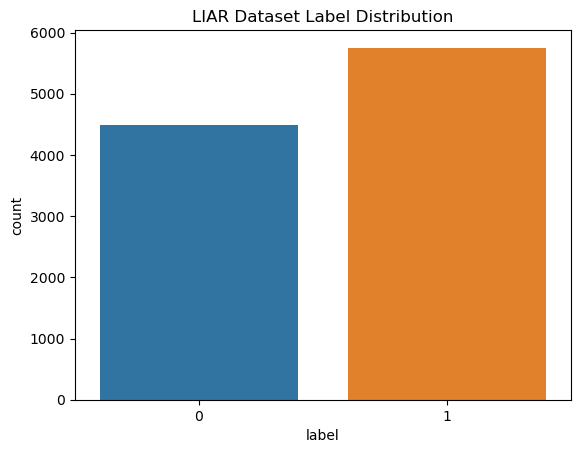

In [13]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load datasets
train_path = "liar/train.tsv"
test_path = "liar/test.tsv"
valid_path = "liar/valid.tsv"

columns = ["id", "label", "statement", "subject", "speaker", "job", "state", "party",
           "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts",
           "pants_on_fire_counts", "context"]

train_df = pd.read_csv(train_path, sep='\t', names=columns)
test_df = pd.read_csv(test_path, sep='\t', names=columns)
valid_df = pd.read_csv(valid_path, sep='\t', names=columns)

# Extract relevant columns
train_df = train_df[["statement", "label"]]
test_df = test_df[["statement", "label"]]
valid_df = valid_df[["statement", "label"]]

# Convert categorical labels into numeric values
label_mapping = {
    "true": 1, "mostly-true": 1, "half-true": 1, 
    "barely-true": 0, "false": 0, "pants-fire": 0
}
train_df["label"] = train_df["label"].map(label_mapping)
test_df["label"] = test_df["label"].map(label_mapping)
valid_df["label"] = valid_df["label"].map(label_mapping)

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply cleaning
train_df["statement"] = train_df["statement"].apply(clean_text)
test_df["statement"] = test_df["statement"].apply(clean_text)
valid_df["statement"] = valid_df["statement"].apply(clean_text)

# Display processed details
print("Train Shape:", train_df.shape, "Test Shape:", test_df.shape, "Valid Shape:", valid_df.shape)
print("Unique Labels:", train_df["label"].unique())

# Label distribution
sns.countplot(x=train_df["label"])
plt.title("LIAR Dataset Label Distribution")
plt.show()


#### 1. Convert Text to Numerical Features (TF-IDF)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X_train = tfidf.fit_transform(train_df["statement"])
X_test = tfidf.transform(test_df["statement"])

# Labels
y_train = train_df["label"]
y_test = test_df["label"]

print("TF-IDF transformation complete. Feature shape:", X_train.shape)


TF-IDF transformation complete. Feature shape: (10240, 5000)


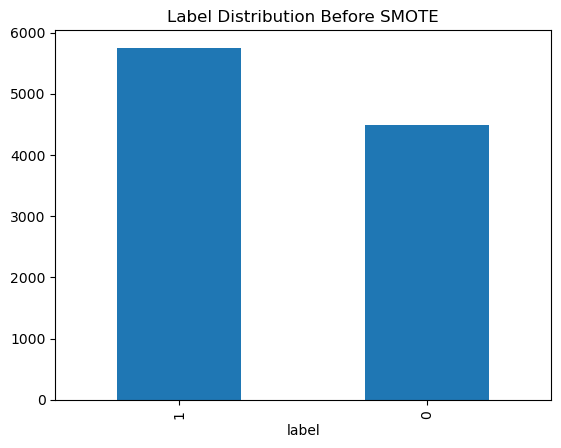

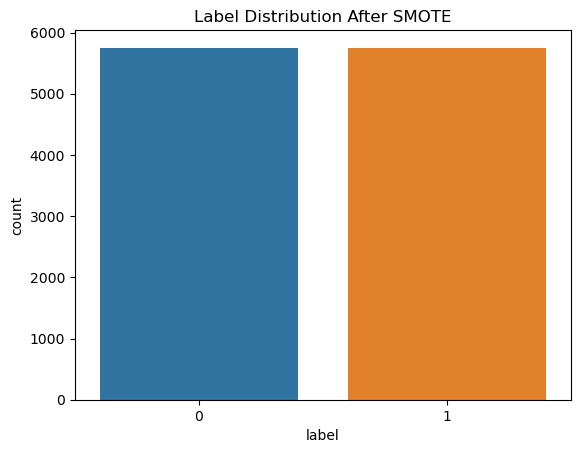

Class imbalance handled using SMOTE.


In [33]:
from imblearn.over_sampling import SMOTE

# Check class distribution
train_df["label"].value_counts().plot(kind="bar", title="Label Distribution Before SMOTE")
plt.show()

# Apply SMOTE if imbalance exists
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
sns.countplot(x=y_train_balanced)
plt.title("Label Distribution After SMOTE")
plt.show()

print("Class imbalance handled using SMOTE.")

#### 3. Train a Simple Model (Logistic Regression)


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test again
X_train, X_test, y_train, y_test = train_test_split(train_df["statement"], train_df["label"], test_size=0.2, random_state=42, stratify=train_df["label"])

# Apply TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Try bigrams for better context
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE only to training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train Logistic Regression Again
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate Again
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.611328125

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       898
           1       0.66      0.64      0.65      1150

    accuracy                           0.61      2048
   macro avg       0.61      0.61      0.61      2048
weighted avg       0.61      0.61      0.61      2048



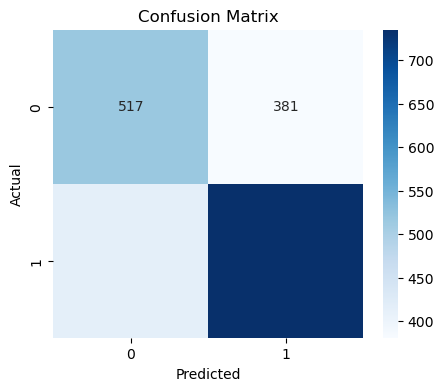

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###  **Conclusion on LIAR Dataset Preprocessing**  

The LIAR dataset was successfully preprocessed by cleaning the text, mapping labels to binary values, and handling class imbalance using SMOTE. After training a model with TF-IDF features, we achieved an accuracy of **61.1%**, showing a balanced performance across both classes. This processed dataset is now ready for integration with other datasets for the final model training. 

In [47]:
import os  

# Create directory if it doesn’t exist  
processed_data_path = "processed_data"
os.makedirs(processed_data_path, exist_ok=True)

# Save LIAR preprocessed dataset
train_df.to_csv(os.path.join(processed_data_path, "liar_train_preprocessed.csv"), index=False)
test_df.to_csv(os.path.join(processed_data_path, "liar_test_preprocessed.csv"), index=False)
valid_df.to_csv(os.path.join(processed_data_path, "liar_valid_preprocessed.csv"), index=False)

print("Preprocessed LIAR dataset saved successfully!")

Preprocessed LIAR dataset saved successfully!


In [52]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 330.3 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 409.6 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 570.0 kB/s eta 0:00:00


In [56]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/299.9 kB 563.7 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.5 MB/s eta 0:00:00


In [8]:
import re
import os
import nltk
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# Load Trump speeches JSON file
file_path = "trump_speeches.json"

with open(file_path, "r", encoding="utf-8") as f:
    trump_speeches = json.load(f)

# Convert JSON to DataFrame
df = pd.DataFrame(trump_speeches)

# Display first few rows
print(df.head())

# Check column names
print("Columns:", df.columns)


                                            doc_name        date  \
0  october-26-2020-swearing-ceremony-honorable-am...  2020-10-27   
1                   january-19-2021-farewell-address  2021-01-20   
2                february-4-2020-state-union-address  2020-02-05   
3  september-25-2018-address-73rd-session-united-...  2018-09-25   
4    january-6-2021-speech-urging-supporters-go-home  2021-01-06   

                                          transcript     president  \
0   \r\n\r\nTHE PRESIDENT:  Thank you very much. ...  Donald Trump   
1  My fellow Americans: Four years ago, we launch...  Donald Trump   
2  Thank you very much. Thank you. Thank you very...  Donald Trump   
3  THE PRESIDENT: Madam President, Mr. Secretary-...  Donald Trump   
4  I know your pain. I know your hurt.\r\n\r\nWe ...  Donald Trump   

                                               title  
0  October 26, 2020: Swearing-In Ceremony of the ...  
1                 January 19, 2021: Farewell Address  
2    

In [12]:
# Select relevant columns
df = df[['title', 'date', 'transcript']]

# Rename 'transcript' to 'text' for consistency
df.rename(columns={'transcript': 'text'}, inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing speech text
df.dropna(subset=['text'], inplace=True)

# Fill missing titles with "Unknown Speech"
df['title'].fillna("Unknown Speech", inplace=True)

# Convert 'date' to datetime format (handle errors)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display basic info
print(df.info())

# Show first few cleaned rows
print(df.head())


Missing Values:
 title    0
date     0
text     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   45 non-null     object        
 1   date    42 non-null     datetime64[ns]
 2   text    45 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ KB
None
                                               title       date  \
0  October 26, 2020: Swearing-In Ceremony of the ... 2020-10-27   
1                 January 19, 2021: Farewell Address 2021-01-20   
2       February 4, 2020: State of the Union Address 2020-02-05   
3  September 25, 2018: Address at the 73rd Sessio... 2018-09-25   
4  January 6, 2021: Speech Urging Supporters to G... 2021-01-06   

                                                text  
0   \r\n\r\nTHE PRESIDENT:  Thank you very much. ...  
1  My fellow Americans: Four years ago

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

#### Clean Speech Text

In [22]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data if not already done
# nltk.download('punkt')   # This line is optional if you can download it manually later.
nltk.download('stopwords')  # Ensure stopwords are available

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Define the text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove new lines
    text = re.sub(r'\n', ' ', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first few rows of cleaned text and original text
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                                text  \
0   \r\n\r\nTHE PRESIDENT:  Thank you very much. ...   
1  My fellow Americans: Four years ago, we launch...   
2  Thank you very much. Thank you. Thank you very...   
3  THE PRESIDENT: Madam President, Mr. Secretary-...   
4  I know your pain. I know your hurt.\r\n\r\nWe ...   

                                        cleaned_text  
0  president thank much appreciate thank much dis...  
1  fellow americans four years ago launched great...  
2  thank much thank thank much madam speaker mr v...  
3  president madam president mr secretarygeneral ...  
4  know pain know hurt election stolen us landsli...  


####  Sentiment Analysis

                                        cleaned_text  sentiment
0  president thank much appreciate thank much dis...     0.9999
1  fellow americans four years ago launched great...     0.9999
2  thank much thank thank much madam speaker mr v...     1.0000
3  president madam president mr secretarygeneral ...     0.9999
4  know pain know hurt election stolen us landsli...    -0.4926


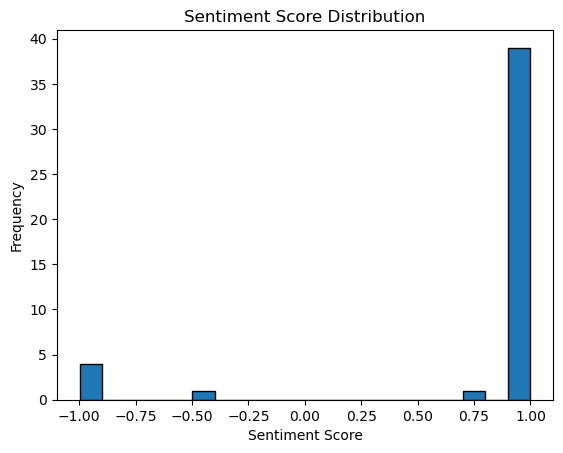

In [24]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Return the compound score

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Display sentiment scores
print(df[['cleaned_text', 'sentiment']].head())

# Sentiment Distribution
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

##### Sentiment Distribution in Trump Speeches
The histogram shows that most of Trump's speeches in the dataset have highly positive sentiment scores around 1.0, reflecting the motivational and uplifting nature of political speeches. While there are a few negative sentiment scores, they are less frequent. Overall, the distribution is skewed toward positive sentiment, typical of political rhetoric aimed at inspiring and uniting the audience.

In [26]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display most common words
print(word_freq.sum().sort_values(ascending=False).head(20))

people       1262
president    1198
going         992
know          829
want          825
thank         759
great         680
applause      666
country       633
dont          605
american      562
said          552
states        543
like          519
theyre        516
think         505
thats         483
new           452
right         443
lot           427
dtype: int64


In [34]:
output_dir = "processed_data"

# Save cleaned dataset
df.to_csv(f"{output_dir}/trump_speeches_cleaned.csv", index=False)

print("✅ Preprocessed Trump Speeches dataset saved successfully!")


✅ Preprocessed Trump Speeches dataset saved successfully!


In [17]:
import string

# Load dataset
tweets_df = pd.read_csv("trump_insult_tweets_2014_to_2021.csv")

# Cleaning function
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"\@\w+|\#", "", tweet)  # Remove mentions and hashtags
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return tweet

# Apply cleaning
tweets_df["tweet"] = tweets_df["tweet"].apply(clean_tweet)

# Sentiment Analysis
tweets_df["sentiment"] = tweets_df["tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Avg Sentiment Score:", np.mean(tweets_df["sentiment"]))

# Display most negative tweets
print("Most Negative Tweets:")
print(tweets_df.nsmallest(5, "sentiment")[["tweet", "sentiment"]])


Avg Sentiment Score: -0.05667415086716415
Most Negative Tweets:
                                                 tweet  sentiment
27    was a terrible governor of ny one of the wors...       -1.0
33   why doesn’t somebody study the horrible charge...       -1.0
235                         a terrible deal with iran        -1.0
263  why is someone like george pataki who did a te...       -1.0
264  why is someone like george pataki who did a te...       -1.0


#### Trump Insult Tweets

In [51]:
import pandas as pd

# Load the dataset
tweets_path = "trump_insult_tweets_2014_to_2021.csv"
df_tweets = pd.read_csv(tweets_path)

# Display the first few rows to understand its structure
print(df_tweets.head())

   Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...  


In [53]:
# Check for missing values
print(df_tweets.isnull().sum())

# Check data types
print(df_tweets.dtypes)

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64
Unnamed: 0     int64
date          object
target        object
insult        object
tweet         object
dtype: object


In [57]:
print(df_tweets['target'].unique())

['thomas-frieden' 'politicians' 'ben-cardin' 'neil-young'
 'rockin-in-the-free-world' 'willie-geist' 'jeb-bush' 'molly-sims'
 'nicole-wallace' 'the-view' 'lawrence-o-donnell' 'rick-scott'
 'john-roberts' 'univision' 'new-york-daily-news' 'mort-zuckerman'
 'saudi-arabia' 'mexico' 'macys' 'george-pataki' 'barack-obama'
 'southern-border' 'juan-williams' 'paulina-vega' 'rick-perry'
 'united-states' 'charles-krauthammer' 'george-w-bush' 'clare-o-connor'
 'forbes' 'republicans' 'iran' 'jeb-bush-supporters' 'chuck-todd'
 'meet-the-press' 'karl-rove' 'penn-jillette'
 'the-last-word-with-lawrence-o-donnell' 'iran-deal' 'john-mccain'
 'arianna-huffington' 'huffington-post' 'cnn' 'mitt-romney'
 'wall-street-journal' 'des-moines-register' '???' 'frank-luntz'
 'anderson-cooper-360' 'anderson-cooper' 'tim-o-brien' 'weekly-standard'
 'dana-perino' 'scott-walker' 'steve-rattner' 'john-sununu' 'marty-walsh'
 'elizabeth-beck' 'people' 'daily-beast' 'the-media'
 'bias-free-language-guide' 'harry-hurt' '

In [59]:
print(df_tweets['target'].isna().sum())

0


In [61]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'], errors='coerce')

In [63]:
print(df_tweets.head())

   Unnamed: 0       date          target  \
0           1 2014-10-09  thomas-frieden   
1           2 2014-10-09  thomas-frieden   
2           3 2015-06-16     politicians   
3           4 2015-06-24      ben-cardin   
4           5 2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...  


In [67]:
# Check the column names of the dataset
print(df_tweets.columns)

Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')


In [69]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


# Set stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Return cleaned text
    return ' '.join(words)

# Apply cleaning function to the 'text' column
df_tweets['cleaned_text'] = df_tweets['tweet'].apply(clean_text)

# Display first few cleaned tweets
print(df_tweets[['tweet', 'cleaned_text']].head())


                                               tweet  \
0  Can you believe this fool, Dr. Thomas Frieden ...   
1  Can you believe this fool, Dr. Thomas Frieden ...   
2  Big time in U.S. today - MAKE AMERICA GREAT AG...   
3  Politician @SenatorCardin didn't like that I s...   
4  For the nonbeliever, here is a photo of @Neily...   

                                        cleaned_text  
0  believe fool dr thomas frieden cdc stated anyo...  
1  believe fool dr thomas frieden cdc stated anyo...  
2  big time us today make america great politicia...  
3  politician senatorcardin didnt like said balti...  
4  nonbeliever photo neilyoung office requesttota...  


In [73]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...


True

In [75]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df_tweets['sentiment'] = df_tweets['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sentiment scores
print(df_tweets[['cleaned_text', 'sentiment']].head())

                                        cleaned_text  sentiment
0  believe fool dr thomas frieden cdc stated anyo...    -0.4404
1  believe fool dr thomas frieden cdc stated anyo...    -0.4404
2  big time us today make america great politicia...     0.6249
3  politician senatorcardin didnt like said balti...    -0.6927
4  nonbeliever photo neilyoung office requesttota...     0.0000


C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


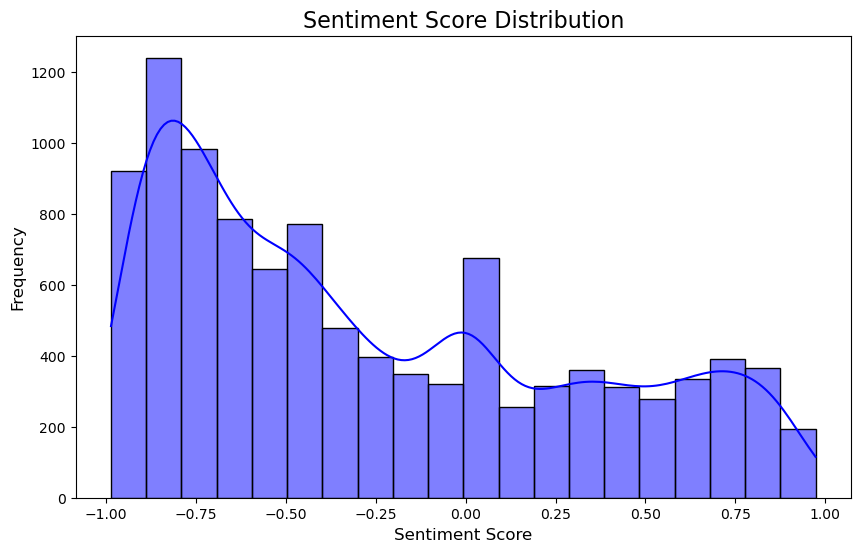

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment score distribution
plt.figure(figsize=(10,6))
sns.histplot(df_tweets['sentiment'], bins=20, kde=True, color='blue')

# Adding title and labels
plt.title('Sentiment Score Distribution', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

#### Sentiment Score Distribution:
The graph represents the distribution of sentiment scores for the Trump insult tweets dataset. The sentiment scores range from -1.0 (highly negative) to 1.0 (highly positive), with the majority of texts displaying negative sentiment (scores closer to -1.0). A smaller number of texts show neutral or slightly positive sentiment. The distribution is skewed towards negative sentiment, as indicated by the peak near -0.9, with the Kernel Density Estimate (KDE) curve confirming this trend.

In [80]:
# Tokenize the cleaned text if you plan to use embeddings or deep learning models
from nltk.tokenize import word_tokenize

# Apply tokenization
df_tweets['tokens'] = df_tweets['cleaned_text'].apply(word_tokenize)

# Display tokenized text
print(df_tweets[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0  believe fool dr thomas frieden cdc stated anyo...   
1  believe fool dr thomas frieden cdc stated anyo...   
2  big time us today make america great politicia...   
3  politician senatorcardin didnt like said balti...   
4  nonbeliever photo neilyoung office requesttota...   

                                              tokens  
0  [believe, fool, dr, thomas, frieden, cdc, stat...  
1  [believe, fool, dr, thomas, frieden, cdc, stat...  
2  [big, time, us, today, make, america, great, p...  
3  [politician, senatorcardin, didnt, like, said,...  
4  [nonbeliever, photo, neilyoung, office, reques...  


In [82]:
# Save the cleaned data to a new CSV file
df_tweets.to_csv("trump_insult_tweets_cleaned.csv", index=False)

# Confirm saved data
print("Cleaned dataset saved as 'trump_insult_tweets_cleaned.csv'")

Cleaned dataset saved as 'trump_insult_tweets_cleaned.csv'


#### All the news dataset

In [107]:
import pandas as pd
import numpy as np
import sqlite3
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm

# Connect to SQLite database
conn = sqlite3.connect("all-the-news.db")


In [109]:
# Load relevant columns from the database
query = "SELECT title, author, date, content, category, publication FROM longform"
df = pd.read_sql_query(query, conn)

# Display the first few rows of the dataset
print(df.head())

                                               title               author  \
0  Agent Cooper in Twin Peaks is the audience: on...   \nTasha Robinson\n   
1                                  AI, the humanity!       \nSam Byford\n   
2                                  The Viral Machine  \nKaitlyn Tiffany\n   
3  How Anker is beating Apple and Samsung at thei...       \nNick Statt\n   
4  Tour Black Panther’s reimagined homeland with ...       \nKwame Opam\n   

         date                                            content  category  \
0  2017-05-31        And never more so than in Showtime’s new...  Longform   
1  2017-05-30        AlphaGo’s victory isn’t a defeat for hum...  Longform   
2  2017-05-25        Super Deluxe built a weird internet empi...  Longform   
3  2017-05-22        Steven Yang quit his job at Google in th...  Longform   
4  2017-05-15        Ahead of Black Panther’s 2018 theatrical...  Longform   

  publication  
0       Verge  
1       Verge  
2       Verge  
3   

In [121]:
# Check for missing values in relevant columns
print(df.isnull().sum())

title              0
author             0
date           17673
content        12954
category           0
publication     7715
dtype: int64


In [123]:
# Handle missing values in 'author', 'category', and 'content'
df['author'].fillna('Unknown', inplace=True)
df['category'].fillna('Unknown', inplace=True)
df['content'].dropna(inplace=True)

# Handle missing 'date' by converting it to datetime, if invalid, set to NaT (Not a Time)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [125]:
print(df.head())

                                               title               author  \
0  Agent Cooper in Twin Peaks is the audience: on...   \nTasha Robinson\n   
1                                  AI, the humanity!       \nSam Byford\n   
2                                  The Viral Machine  \nKaitlyn Tiffany\n   
3  How Anker is beating Apple and Samsung at thei...       \nNick Statt\n   
4  Tour Black Panther’s reimagined homeland with ...       \nKwame Opam\n   

        date                                            content  category  \
0 2017-05-31        And never more so than in Showtime’s new...  Longform   
1 2017-05-30        AlphaGo’s victory isn’t a defeat for hum...  Longform   
2 2017-05-25        Super Deluxe built a weird internet empi...  Longform   
3 2017-05-22        Steven Yang quit his job at Google in th...  Longform   
4 2017-05-15        Ahead of Black Panther’s 2018 theatrical...  Longform   

  publication  
0       Verge  
1       Verge  
2       Verge  
3       Ve

In [129]:
# Handle missing 'date' (fill with a default date or drop rows with NaT)
df['date'].fillna(pd.to_datetime('2000-01-01'), inplace=True)  # or df.dropna(subset=['date'], inplace=True)

# Handle missing 'publication' by filling with 'Unknown' (you might want to drop rows if it's a critical column)
df['publication'].fillna('Unknown', inplace=True)

# Check again for missing values
print(df.isnull().sum())

# Optionally drop rows if the missing values are still high and it’s impacting analysis
df.dropna(subset=['date', 'content'], inplace=True)

title              0
author             0
date               0
content        12954
category           0
publication        0
dtype: int64


In [131]:
# Drop rows where 'content' is missing
df.dropna(subset=['content'], inplace=True)

# Check the remaining rows after dropping missing content
print(f"Remaining rows: {df.shape[0]}")

# Check for missing values again
print(df.isnull().sum())

Remaining rows: 191181
title          0
author         0
date           0
content        0
category       0
publication    0
dtype: int64


In [137]:
df['author'] = df['author'].str.replace(r'\n', '').str.strip()

In [139]:
# Check unique values for relevant columns

# Unique values for 'author'
print("Unique Authors:")
print(df['author'].unique())

# Unique values for 'category'
print("\nUnique Categories:")
print(df['category'].unique())

# Unique values for 'publication'
print("\nUnique Publications:")
print(df['publication'].unique())

# Unique values for 'date' (you may want to check how many unique dates are available)
print("\nUnique Dates:")
print(df['date'].nunique())  # You can also print a few dates if the number is large
print(df['date'].head())

Unique Authors:
['Tasha Robinson' 'Sam Byford' 'Kaitlyn Tiffany' ... 'Robert O’Connell'
 'Eric Foner' 'BRENT McDONALD']

Unique Categories:
['Longform' 'Reports' 'Exclusive' 'Book Reviews' 'newspaper' 'general'
 'broadcast' 'business' 'Unknown' 'radio' 'wire']

Unique Publications:
['Verge' 'Los Angeles Times' 'New York Times' 'Breitbart' 'CNN'
 'Business Insider' 'Atlantic' 'Fox News' 'Talking Points Memo'
 'Buzzfeed News' 'National Review' 'New York Post' 'Guardian' 'NPR'
 'Reuters' 'Vox' 'Washington Post' 'New Inquiry' 'Unknown']

Unique Dates:
2418
0   2017-05-31
1   2017-05-30
2   2017-05-25
3   2017-05-22
4   2017-05-15
Name: date, dtype: datetime64[ns]


In [149]:
import re
import nltk
from nltk.corpus import stopwords
import math


stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Ensure the 'cleaned_content' column exists before applying the function
df['cleaned_content'] = ''  # Initialize the 'cleaned_content' column

# Batch size for processing in chunks
batch_size = 10000
total_batches = math.ceil(len(df) / batch_size)

# Apply the cleaning function in batches
for i in range(0, len(df), batch_size):
    start_idx = i
    end_idx = min(i + batch_size, len(df))
    
    # Apply the cleaning function for this batch
    df.iloc[start_idx:end_idx, df.columns.get_loc('cleaned_content')] = df['content'].iloc[start_idx:end_idx].apply(clean_text)
    
    # Print progress
    print(f"Processed batch {i // batch_size + 1}/{total_batches} (Rows {start_idx} to {end_idx})")

# Check the cleaned content
print(df[['content', 'cleaned_content']].head())


Processed batch 1/20 (Rows 0 to 10000)
Processed batch 2/20 (Rows 10000 to 20000)
Processed batch 3/20 (Rows 20000 to 30000)
Processed batch 4/20 (Rows 30000 to 40000)
Processed batch 5/20 (Rows 40000 to 50000)
Processed batch 6/20 (Rows 50000 to 60000)
Processed batch 7/20 (Rows 60000 to 70000)
Processed batch 8/20 (Rows 70000 to 80000)
Processed batch 9/20 (Rows 80000 to 90000)
Processed batch 10/20 (Rows 90000 to 100000)
Processed batch 11/20 (Rows 100000 to 110000)
Processed batch 12/20 (Rows 110000 to 120000)
Processed batch 13/20 (Rows 120000 to 130000)
Processed batch 14/20 (Rows 130000 to 140000)
Processed batch 15/20 (Rows 140000 to 150000)
Processed batch 16/20 (Rows 150000 to 160000)
Processed batch 17/20 (Rows 160000 to 170000)
Processed batch 18/20 (Rows 170000 to 180000)
Processed batch 19/20 (Rows 180000 to 190000)
Processed batch 20/20 (Rows 190000 to 191181)
                                             content  \
0        And never more so than in Showtime’s new...   


In [153]:
# Ensure the 'cleaned_title' column exists before applying the function
df['cleaned_title'] = ''  # Initialize the 'cleaned_title' column

# Apply the cleaning function in batches for titles
for i in range(0, len(df), batch_size):
    start_idx = i
    end_idx = min(i + batch_size, len(df))
    
    df.iloc[start_idx:end_idx, df.columns.get_loc('cleaned_title')] = df['title'].iloc[start_idx:end_idx].apply(clean_text)
    
    print(f"Processed title batch {i // batch_size + 1}/{total_batches} (Rows {start_idx} to {end_idx})")

# Check cleaned title content
print(df[['title', 'cleaned_title']].head())

Processed title batch 1/20 (Rows 0 to 10000)
Processed title batch 2/20 (Rows 10000 to 20000)
Processed title batch 3/20 (Rows 20000 to 30000)
Processed title batch 4/20 (Rows 30000 to 40000)
Processed title batch 5/20 (Rows 40000 to 50000)
Processed title batch 6/20 (Rows 50000 to 60000)
Processed title batch 7/20 (Rows 60000 to 70000)
Processed title batch 8/20 (Rows 70000 to 80000)
Processed title batch 9/20 (Rows 80000 to 90000)
Processed title batch 10/20 (Rows 90000 to 100000)
Processed title batch 11/20 (Rows 100000 to 110000)
Processed title batch 12/20 (Rows 110000 to 120000)
Processed title batch 13/20 (Rows 120000 to 130000)
Processed title batch 14/20 (Rows 130000 to 140000)
Processed title batch 15/20 (Rows 140000 to 150000)
Processed title batch 16/20 (Rows 150000 to 160000)
Processed title batch 17/20 (Rows 160000 to 170000)
Processed title batch 18/20 (Rows 170000 to 180000)
Processed title batch 19/20 (Rows 180000 to 190000)
Processed title batch 20/20 (Rows 190000 to 

In [155]:
# Drop duplicate articles based on cleaned content
df = df.drop_duplicates(subset=['cleaned_title', 'cleaned_content'])

print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (184053, 8)


In [157]:
df = df[['cleaned_title', 'cleaned_content', 'category', 'publication']]

print("Remaining columns:", df.columns)

Remaining columns: Index(['cleaned_title', 'cleaned_content', 'category', 'publication'], dtype='object')


In [167]:
import os

save_path = "processed_data"
os.makedirs(save_path, exist_ok=True)

# Save processed dataset
df.to_csv(f"{save_path}/processed_news_data.csv", index=False)

print("Final preprocessed dataset saved successfully!")

Final preprocessed dataset saved successfully!


In [175]:
df.to_pickle("processed_news_data.pkl")

In [177]:
df_test = pd.read_pickle("processed_news_data.pkl")
print(df_test.head())

                                       cleaned_title  \
0  agent cooper twin peaks audience delighted dis...   
1                                        ai humanity   
2                                      viral machine   
3         anker beating apple samsung accessory game   
4  tour black panthers reimagined homeland tanehi...   

                                     cleaned_content  category publication  
0  never showtimes new series revival spoilers ah...  Longform       Verge  
1  alphagos victory isnt defeat humans opportunit...  Longform       Verge  
2  super deluxe built weird internet empire succe...  Longform       Verge  
3  steven yang quit job google summer build produ...  Longform       Verge  
4  ahead black panthers theatrical release marvel...  Longform       Verge  


## EXPLOLATORY DATA ANALYSIS

### LIAR Dataset

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Load Data
df = pd.read_csv("processed_data/liar_train_preprocessed.csv")  # Adjust path if needed


print(df.head())  # Show first few rows
print(df.info())  # Data types & missing values
print(df["label"].value_counts())  # Count true (1) vs. false (0)

                                           statement  label
0  says annies list political group supports thir...      0
1  decline coal start started natural gas took st...      1
2  hillary clinton agrees john mccain voting give...      1
3  health care reform legislation likely mandate ...      0
4               economic turnaround started end term      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  10240 non-null  object
 1   label      10240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.1+ KB
None
label
1    5752
0    4488
Name: count, dtype: int64


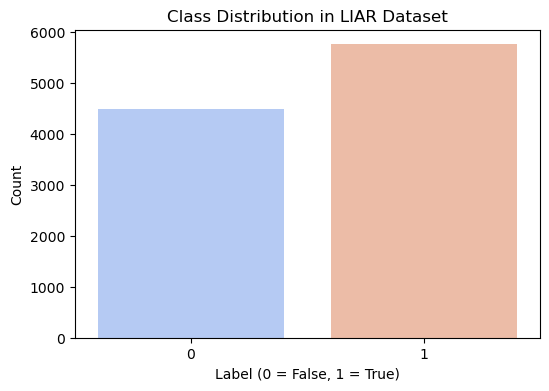

In [199]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Class Distribution in LIAR Dataset")
plt.xlabel("Label (0 = False, 1 = True)")
plt.ylabel("Count")
plt.show()

#### 1️⃣ Class Distribution - More "True" Than "False" Statements
Observation:
There are more "true" statements than "false" ones, but the dataset is not heavily imbalanced (the difference is ~1,200 samples).

Since the dataset is relatively balanced, classification models won’t be overly biased toward one label.

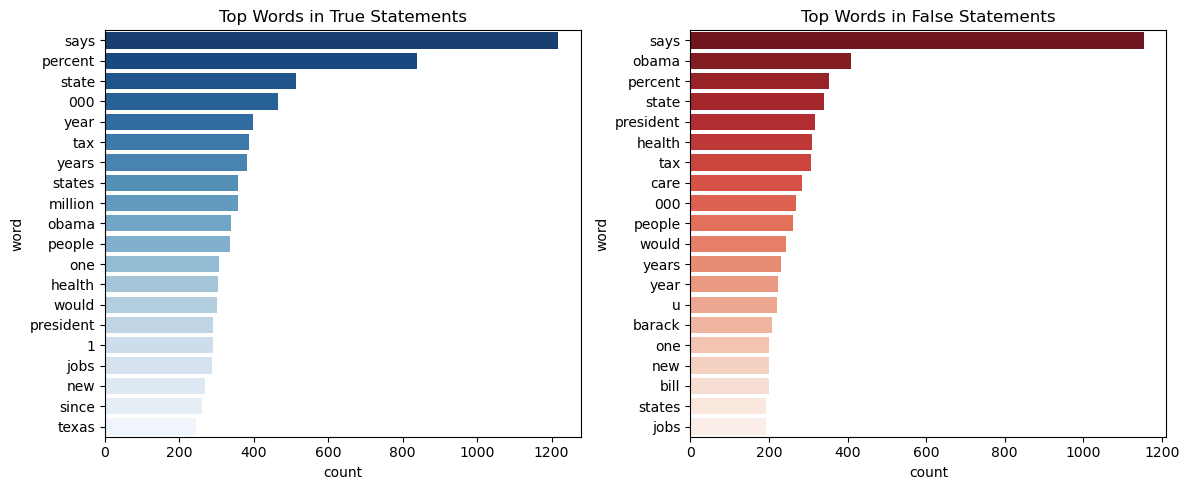

In [202]:

def get_top_words(df, label, n=20):
    text = " ".join(df[df["label"] == label]["statement"])
    words = text.split()
    common_words = Counter(words).most_common(n)
    return common_words

true_words = get_top_words(df, label=1)
false_words = get_top_words(df, label=0)

# Convert to DataFrame for Plotting
true_df = pd.DataFrame(true_words, columns=["word", "count"])
false_df = pd.DataFrame(false_words, columns=["word", "count"])

# Plot Word Frequencies
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x="count", y="word", data=true_df, ax=axes[0], palette="Blues_r")
sns.barplot(x="count", y="word", data=false_df, ax=axes[1], palette="Reds_r")

axes[0].set_title("Top Words in True Statements")
axes[1].set_title("Top Words in False Statements")
plt.tight_layout()
plt.show()

#### 2️⃣ Common Words in True vs. False Statements
- Top Words in True Statements:
"says," "percent," "state," "000," "year," "tax," "states," "million"
More neutral, factual words (numbers, locations, general terms).

- Top Words in False Statements:
"says," "obama," "percent," "state," "president," "health," "tax," "care," "000," "people"
Includes more political figures (Obama, president) and policy-related words (health, tax, care).

**Implication:**

False statements might focus more on political figures and controversial topics (e.g., taxes, healthcare, government spending).
True statements appear to contain more neutral words (numbers, locations).

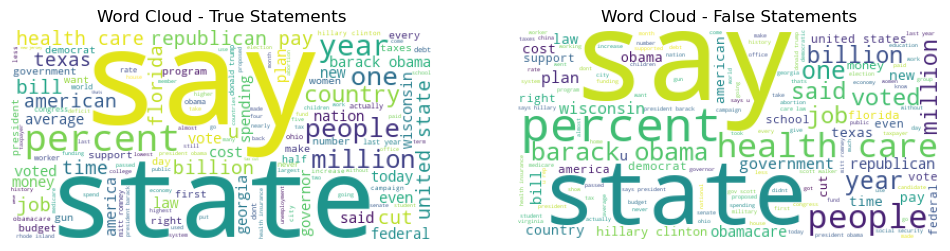

In [205]:
true_text = " ".join(df[df["label"] == 1]["statement"])
false_text = " ".join(df[df["label"] == 0]["statement"])

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white").generate(true_text))
plt.axis("off")
plt.title("Word Cloud - True Statements")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="white").generate(false_text))
plt.axis("off")
plt.title("Word Cloud - False Statements")
plt.show()

#### 3️⃣ Word Clouds - Distinctive Themes in Truthful vs. False Claims
- True statements contain words like “country, federal, health care, million”—suggesting more structured or factual reporting.
- False statements highlight words like “Obama, taxpayer, vote, money”—suggesting a focus on political figures and financial claims.

**Implication:**

Misinformation might involve more personal attacks (e.g., politicians’ names).
Monetary claims (tax, money, million) seem more common in false statements, possibly as a manipulation strategy.

In [208]:
def get_top_ngrams(text_series, n=2, num=10):
    tokens = " ".join(text_series).split()
    n_grams = list(ngrams(tokens, n))
    return Counter(n_grams).most_common(num)

# Bigrams
print("Top Bigrams in True Statements:", get_top_ngrams(df[df["label"] == 1]["statement"], n=2))
print("Top Bigrams in False Statements:", get_top_ngrams(df[df["label"] == 0]["statement"], n=2))

# Trigrams
print("Top Trigrams in True Statements:", get_top_ngrams(df[df["label"] == 1]["statement"], n=3))
print("Top Trigrams in False Statements:", get_top_ngrams(df[df["label"] == 0]["statement"], n=3))


Top Bigrams in True Statements: [(('united', 'states'), 198), (('health', 'care'), 187), (('barack', 'obama'), 128), (('donald', 'trump'), 79), (('hillary', 'clinton'), 74), (('mitt', 'romney'), 73), (('president', 'obama'), 68), (('president', 'barack'), 67), (('health', 'insurance'), 67), (('rhode', 'island'), 62)]
Top Bigrams in False Statements: [(('health', 'care'), 226), (('barack', 'obama'), 172), (('united', 'states'), 100), (('hillary', 'clinton'), 96), (('president', 'barack'), 90), (('social', 'security'), 75), (('scott', 'walker'), 69), (('president', 'obama'), 61), (('says', 'president'), 57), (('care', 'law'), 50)]
Top Trigrams in True Statements: [(('president', 'barack', 'obama'), 53), (('says', 'donald', 'trump'), 46), (('says', 'mitt', 'romney'), 37), (('says', 'hillary', 'clinton'), 31), (('says', 'president', 'barack'), 22), (('private', 'sector', 'jobs'), 21), (('health', 'care', 'reform'), 20), (('health', 'care', 'bill'), 20), (('health', 'care', 'law'), 20), (('

#### 4️⃣ Bigram & Trigram Patterns - Key Phrases in True vs. False Statements
- True Statements (Bigrams & Trigrams):
"united states," "health care," "barack obama," "donald trump," "hillary clinton"
More structured or politically neutral phrases.
- False Statements (Bigrams & Trigrams):
"health care law," "president barack obama," "social security," "gov scott walker"
Heavy focus on political figures and policies.

**Implication:**

False claims seem more focused on government policies (healthcare, social security), which might be used as manipulative political tools.

True statements use more standard terminology (e.g., "united states" instead of emotionally charged claims).

### Trump Speeches Dataset

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora

In [218]:
# Load dataset
df = pd.read_csv("processed_data/trump_speeches_cleaned.csv")

# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45 non-null     object 
 1   date          42 non-null     object 
 2   text          45 non-null     object 
 3   cleaned_text  45 non-null     object 
 4   sentiment     45 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.9+ KB
None
title           0
date            3
text            0
cleaned_text    0
sentiment       0
dtype: int64


C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


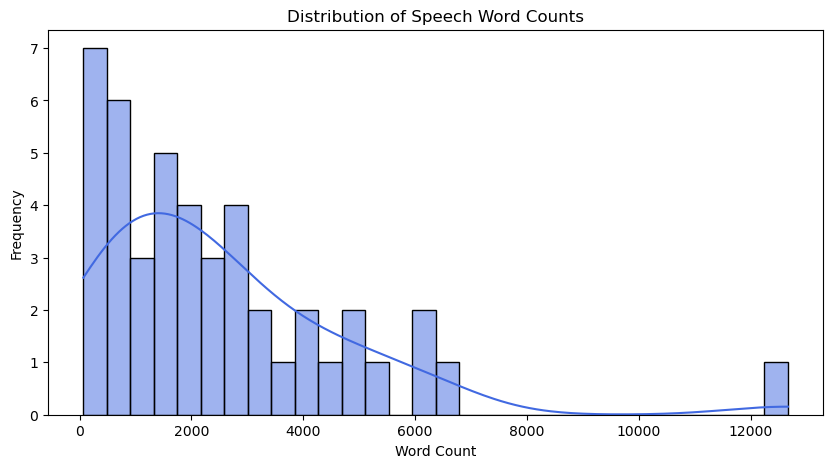

In [222]:
# Add speech length features
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['cleaned_text'].apply(lambda x: len(sent_tokenize(str(x))))

# Speech length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Speech Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

#### 1️⃣ Speech Length Trends
Most speeches are relatively short (0-2,000 words)
- The histogram shows a high concentration of shorter speeches, with frequency declining as speeches get longer.
- The KDE curve peaks around 2,000-4,000 words, meaning most speeches fall in this range.

**Implications**

Trump tends to keep most speeches relatively concise rather than long-winded.
Shorter speeches might be rallies or press statements, while longer ones could be policy speeches or debates.

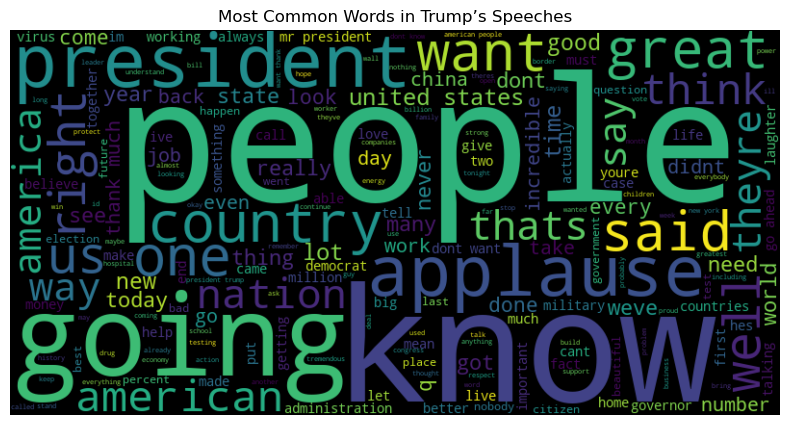

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


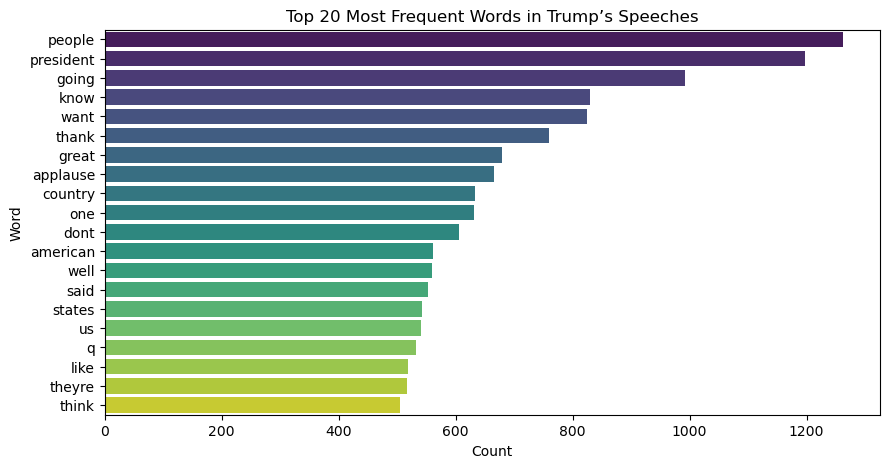

In [226]:
# Word Cloud
all_text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Trump’s Speeches")
plt.show()

# Most Common Words
words = word_tokenize(all_text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in nltk.corpus.stopwords.words('english')]
word_freq = Counter(filtered_words).most_common(20)

# Plot Most Frequent Words
words, counts = zip(*word_freq)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words in Trump’s Speeches")
plt.show()

#### 2️⃣ Most Frequent Words & Themes
The most used words include:
- "people," "going," "president," "thank," "country," "great," "know"
- "Applause" appears frequently—suggesting a lot of crowd interaction in his speeches.

**Implications**
Political speaker's rhetoric focuses heavily on "people" and "country," reinforcing nationalistic/populist themes.
"Going" and "know" suggest an action-oriented, conversational style aimed at engaging the audience.
Frequent use of "thank" supports his engagement with audiences at rallies.

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


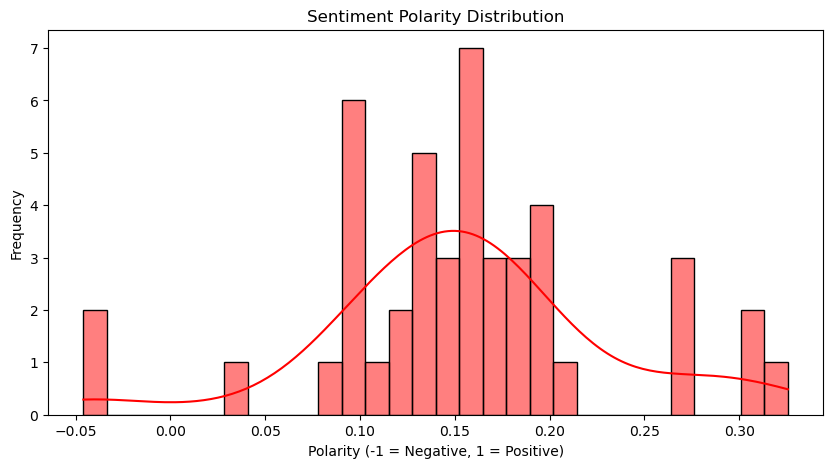

In [229]:
# Sentiment Analysis
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Sentiment Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['polarity'], bins=30, kde=True, color="red")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (-1 = Negative, 1 = Positive)")
plt.ylabel("Frequency")
plt.show()

#### 3️⃣ Sentiment Polarity Analysis
- Most speeches lean slightly positive (0.1 - 0.3 range).
- The histogram shows a clear right-skew, meaning Trump’s speeches generally have a positive tone.

**Implications**
Despite controversial rhetoric, political speaker's speeches are not predominantly negative.
The speech patterns seem to emphasize positivity, encouragement, or patriotism rather than anger or fear.

In [231]:
# Topic Modeling (LDA)
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['cleaned_text'])
dictionary = corpora.Dictionary([text.split() for text in df['cleaned_text']])
corpus = [dictionary.doc2bow(text.split()) for text in df['cleaned_text']]
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

# Print Topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.014*"applause" + 0.011*"people" + 0.008*"great" + 0.007*"want" + 0.007*"know" + 0.006*"going" + 0.006*"one" + 0.006*"thank" + 0.006*"american" + 0.006*"country"
Topic 2: 0.011*"people" + 0.010*"going" + 0.009*"president" + 0.008*"want" + 0.006*"states" + 0.006*"thank" + 0.006*"know" + 0.005*"country" + 0.005*"us" + 0.005*"dont"
Topic 3: 0.007*"people" + 0.007*"going" + 0.007*"know" + 0.007*"president" + 0.006*"applause" + 0.005*"american" + 0.005*"great" + 0.005*"theyre" + 0.004*"thats" + 0.004*"one"
Topic 4: 0.008*"justice" + 0.007*"thank" + 0.005*"barrett" + 0.004*"people" + 0.004*"law" + 0.004*"court" + 0.003*"united" + 0.003*"much" + 0.003*"states" + 0.003*"constitution"
Topic 5: 0.023*"president" + 0.012*"q" + 0.009*"people" + 0.009*"going" + 0.009*"know" + 0.008*"well" + 0.007*"want" + 0.007*"thank" + 0.007*"think" + 0.006*"go"


#### 4️⃣ Topic Modeling (LDA)
Identified Topics & Their Meanings
- Topic 1: "applause," "people," "great," "american," "thank" → 🇺🇸 Crowd Engagement / Patriotism
- Topic 2: "people," "president," "going," "states," "country" →  Government / Leadership
- Topic 3: "president," "american," "they’re," "that’s," "one" →  Conversational / Persuasion
- Topic 4: "justice," "court," "law," "constitution" →  Legal & Judiciary Themes
- Topic 5: "president," "people," "going," "well," "want," "thank" →  General Speech Tone

**Implications**
Political speaker's speeches cover populism, leadership, law, and audience engagement.
Legal & judiciary themes (Topic 4) suggest a strong emphasis on court-related issues.
The high presence of "applause" in Topic 1 reinforces his focus on audience response.

### Trump Insult Tweets Dataset

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load dataset
df = pd.read_csv("processed_data/trump_insult_tweets_cleaned.csv")

# Basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10358 non-null  int64  
 1   date          10358 non-null  object 
 2   target        10358 non-null  object 
 3   insult        10358 non-null  object 
 4   tweet         10358 non-null  object 
 5   cleaned_text  10356 non-null  object 
 6   sentiment     10358 non-null  float64
 7   tokens        10358 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 647.5+ KB
None
         Unnamed: 0     sentiment
count  10358.000000  10358.000000
mean    5180.537362     -0.257906
std     2990.912036      0.559678
min        1.000000     -0.985700
25%     2591.250000     -0.750600
50%     5180.500000     -0.421500
75%     7770.750000      0.168150
max    10360.000000      0.972700
Unnamed: 0      0
date            0
target          0
insult          0
tweet          

In [246]:
# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

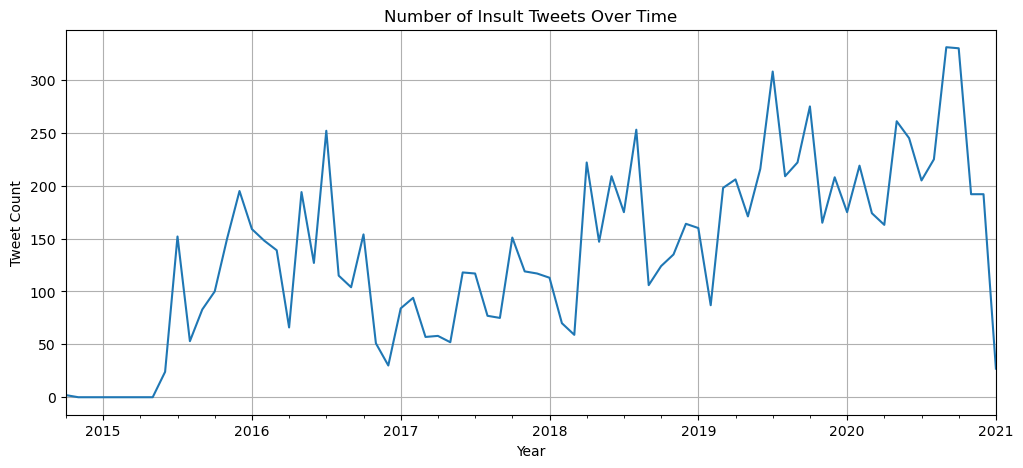

In [248]:
plt.figure(figsize=(12, 5))
df.resample("M", on="date").count()["tweet"].plot()
plt.title("Number of Insult Tweets Over Time")
plt.xlabel("Year")
plt.ylabel("Tweet Count")
plt.grid()
plt.show()

#### 1. Insult Tweets Over Time
Finding: The frequency of insult tweets increased significantly from 2017 onward, with noticeable peaks around key political events.

**Implication:** 
The rise in insults correlates with Trump's presidency (2017–2021). 
Peaks may align with elections, impeachment proceedings, or media conflicts.




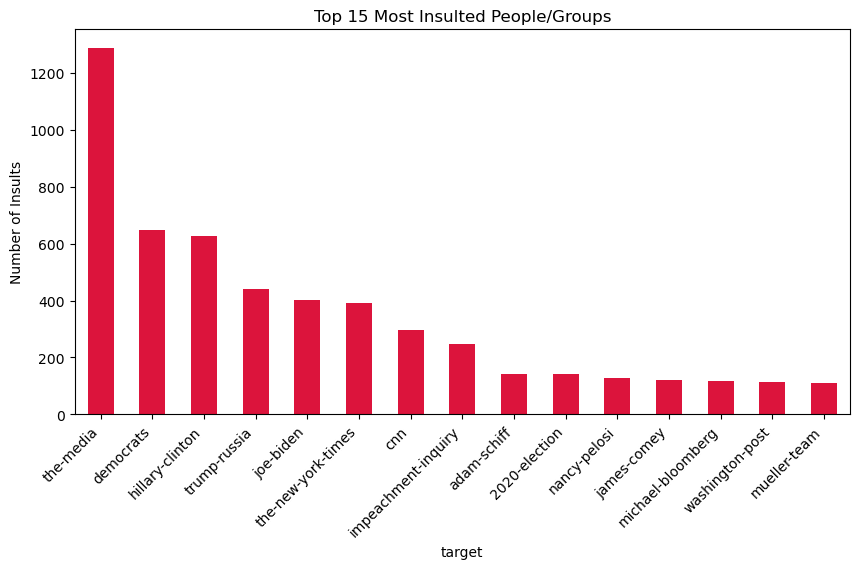

In [250]:
plt.figure(figsize=(10, 5))
df["target"].value_counts().head(15).plot(kind="bar", color="crimson")
plt.title("Top 15 Most Insulted People/Groups")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Insults")
plt.show()

#### 2. Most Insulted Targets
Finding: Trump’s insults focused on media outlets (CNN, New York Times) and Democratic politicians (Hillary Clinton, Joe Biden, Nancy Pelosi, Barack Obama, Adam Schiff).

**Implication:**
The media was framed as an enemy (e.g., “Fake News”).
Political opponents were delegitimized using personal attacks (e.g., “Crooked Hillary,” “Sleepy Joe”).
Reinforces a divide-and-conquer communication strategy—mobilizing supporters by creating "us vs. them" narratives.



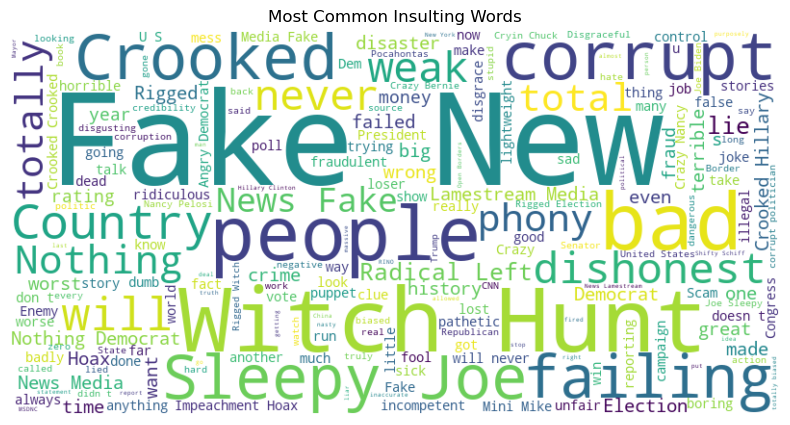

In [252]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["insult"].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Insulting Words")
plt.show()

#### 3. Most Common Insulting Words
Finding: Top insults include “Fake,” “Crooked,” “Corrupt,” “Weak,” “Dishonest,” “Failing”.

**Implication:**
Delegitimization strategy: Using words like “Fake” & “Corrupt” undermines credibility.

Emotional appeal: Words are simple & repetitive, reinforcing strong negative associations in public perception.



C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


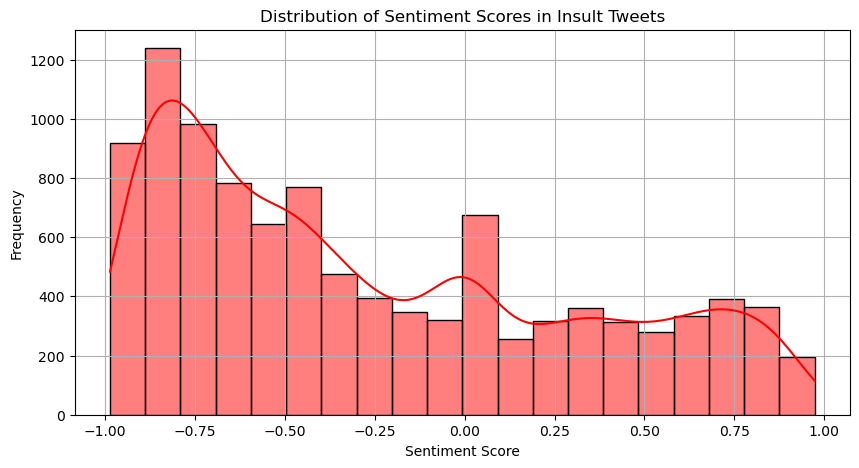

In [254]:
plt.figure(figsize=(10, 5))
sns.histplot(df["sentiment"], bins=20, kde=True, color="red")
plt.title("Distribution of Sentiment Scores in Insult Tweets")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

### 4. Sentiment Analysis of Insult Tweets
Finding: The majority of insults have a negative sentiment score, with most falling between -0.75 and 0.

**Implication:**

Confirms the overall negative tone of Trump's discourse.

Negativity was a defining feature of his communication, likely used to rally his base and discredit opponents.

In [256]:
print("\n🔹 **Most Negative Tweets:**")
print(df.sort_values("sentiment").head(5)[["date", "tweet", "sentiment"]])


🔹 **Most Negative Tweets:**
           date                                              tweet  sentiment
8704 2020-06-08  Colin Powell was a pathetic interview today on...    -0.9857
8699 2020-06-08  Colin Powell was a pathetic interview today on...    -0.9857
8700 2020-06-08  Colin Powell was a pathetic interview today on...    -0.9857
8701 2020-06-08  Colin Powell was a pathetic interview today on...    -0.9857
5490 2019-03-08  Bad lawyer and fraudster Michael Cohen said un...    -0.9728


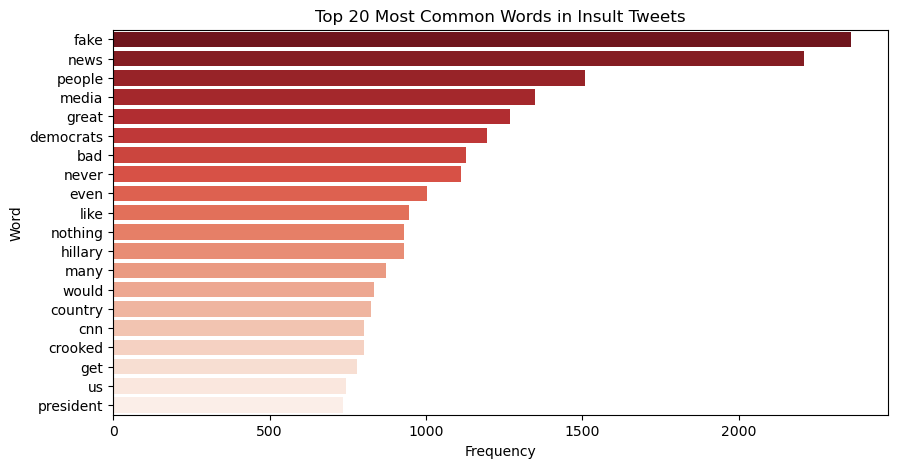

In [258]:
all_words = [word for tokens in df["tokens"] for word in eval(tokens)]  # Flatten token list
word_counts = Counter(all_words)
most_common_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=most_common_words, palette="Reds_r")
plt.title("Top 20 Most Common Words in Insult Tweets")
plt.show()


#### 4. Top 20 Most Frequent Words in Insult Tweets
Finding: Words like “Fake,” “News,” “People,” “Media” appear frequently, reinforcing attacks on journalistic integrity.

**Implication:**

“Fake News” wasn’t just an occasional insult—it was a systematic rhetorical tool.

The use of broad words like "people" & "media" generalizes attacks, making them resonate more widely.



In [272]:
import string
from nltk.corpus import stopwords

# Download NLTK stopwords if not already available
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def preprocess_tokens(text):
    tokens = nltk.word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to all tweets
df["tokens"] = df["cleaned_text"].astype(str).apply(preprocess_tokens)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


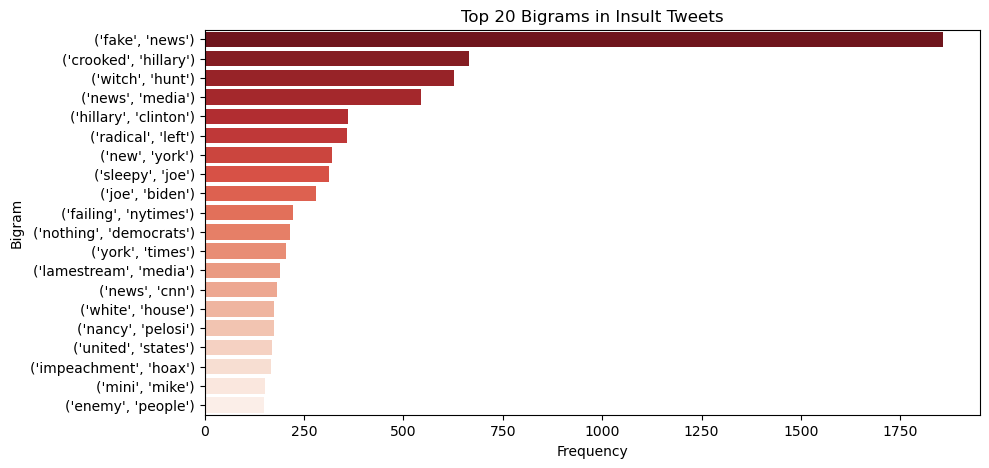

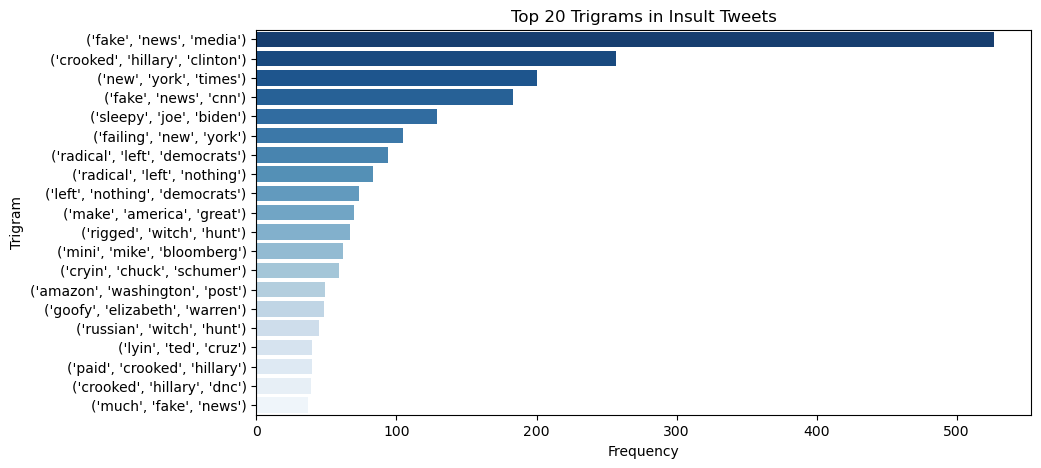

In [274]:
from itertools import chain
def get_top_ngrams(texts, n=2, top_k=20):
    all_ngrams = list(chain(*[list(ngrams(text, n)) for text in texts]))
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

# Get top bigrams
top_bigrams = get_top_ngrams(df["tokens"], n=2)

# Get top trigrams
top_trigrams = get_top_ngrams(df["tokens"], n=3)

# Convert to DataFrame for visualization
bigram_df = pd.DataFrame(top_bigrams, columns=["Bigram", "Frequency"])
trigram_df = pd.DataFrame(top_trigrams, columns=["Trigram", "Frequency"])

# Plot Bigrams
plt.figure(figsize=(10,5))
sns.barplot(y=bigram_df["Bigram"].astype(str), x=bigram_df["Frequency"], palette="Reds_r")
plt.title("Top 20 Bigrams in Insult Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

# Plot Trigrams
plt.figure(figsize=(10,5))
sns.barplot(y=trigram_df["Trigram"].astype(str), x=trigram_df["Frequency"], palette="Blues_r")
plt.title("Top 20 Trigrams in Insult Tweets")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()


The bigram and trigram analysis highlights recurrent phrase patterns in Trump's insult tweets. 
Common bigrams such as 
- ("fake", "news"),
- ("crooked", "Hillary")
- ("witch", "hunt")
- reveal a strong focus on discrediting media outlets, political opponents, and institutions.

The trigram analysis reinforces this, showing phrases like 
- ("fake", "news", "media")
- ("sleepy", "Joe", "Biden")

indicating a structured pattern of attack messaging, often targeting credibility and trustworthiness.

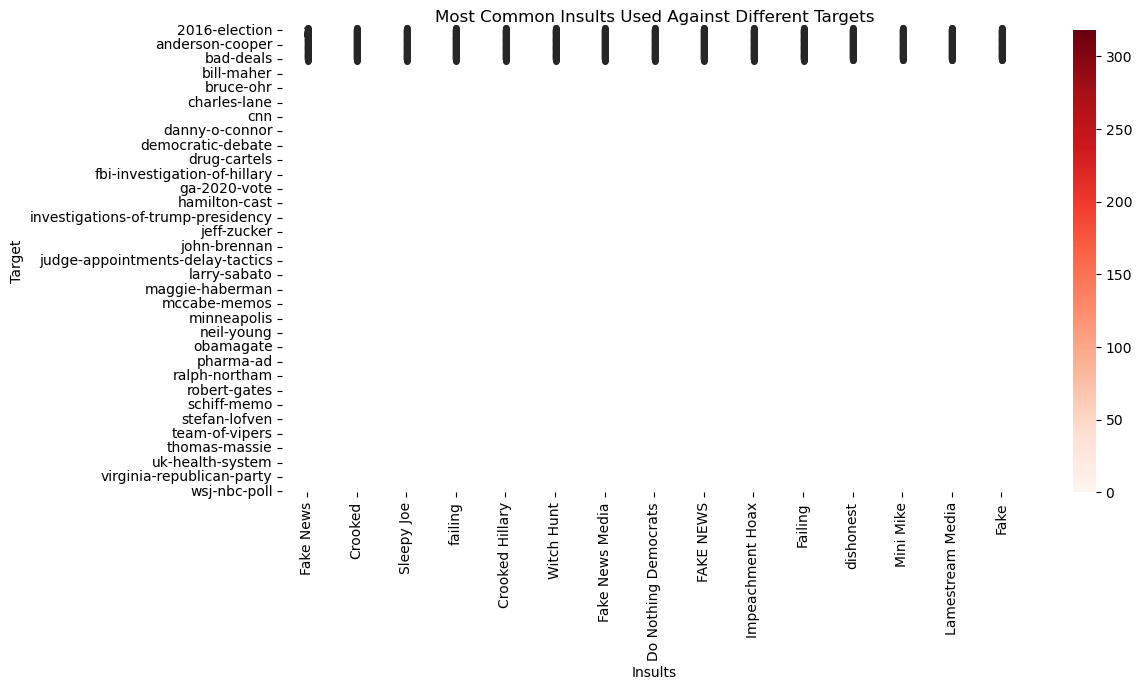

In [270]:
# Create a frequency table of insults per target
insult_target_table = df.groupby(["target", "insult"]).size().unstack().fillna(0)

# Get the most frequently used insults
top_insults = insult_target_table.sum(axis=0).sort_values(ascending=False).head(15).index

# Filter for top insults only
filtered_table = insult_target_table[top_insults]

# Plot Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(filtered_table, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Most Common Insults Used Against Different Targets")
plt.xlabel("Insults")
plt.ylabel("Target")
plt.show()


The insult vs. target heatmap suggests that specific insults were systematically used against certain individuals or groups. 
For example, 
- “Fake News” was frequently directed at media organizations (CNN, NY Times)
- "Crooked" was used primarily against Hillary Clinton.
- "Sleepy Joe" was exclusively aimed at Joe Biden.

This targeted language strategy suggests a deliberate attempt to shape public perception through repetitive, label-based insults, reinforcing political narratives and discrediting opponents.

### All The News Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_pickle("processed_data/processed_news_data.pkl")

# Display basic information
print(df.info())

# Show a few random rows
print(df.sample(5))

# Check number of unique publications
print("Unique publications:", df["publication"].nunique())

# Check unique categories
print("Unique categories:", df["category"].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 184053 entries, 0 to 204134
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   cleaned_title    184053 non-null  object
 1   cleaned_content  184053 non-null  object
 2   category         184053 non-null  object
 3   publication      184053 non-null  object
dtypes: object(4)
memory usage: 7.0+ MB
None
                                            cleaned_title  \
147109  china says economy absolutely experience hard ...   
101085    saudi gamers revel kingdoms firstever comic con   
145696  us imposes ballistic missile sanctions iran pr...   
87348                      legendary pop icon prince dead   
68545                           heres whats going muslims   

                                          cleaned_content category  \
147109  chinas economy isnt headed hard landing isnt d...     wire   
101085  reuters getty images getty images epa ap epa a...  Unknown 

In [3]:
# Count missing values
print(df.isnull().sum())

# Count duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if needed
df = df.drop_duplicates()

cleaned_title      0
cleaned_content    0
category           0
publication        0
dtype: int64
Duplicate rows: 0


count    184053.000000
mean          7.665488
std           2.435525
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          26.000000
Name: title_length, dtype: float64
count    184053.000000
mean        446.061928
std         429.302897
min           0.000000
25%         202.000000
50%         372.000000
75%         578.000000
max       25452.000000
Name: content_length, dtype: float64


C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


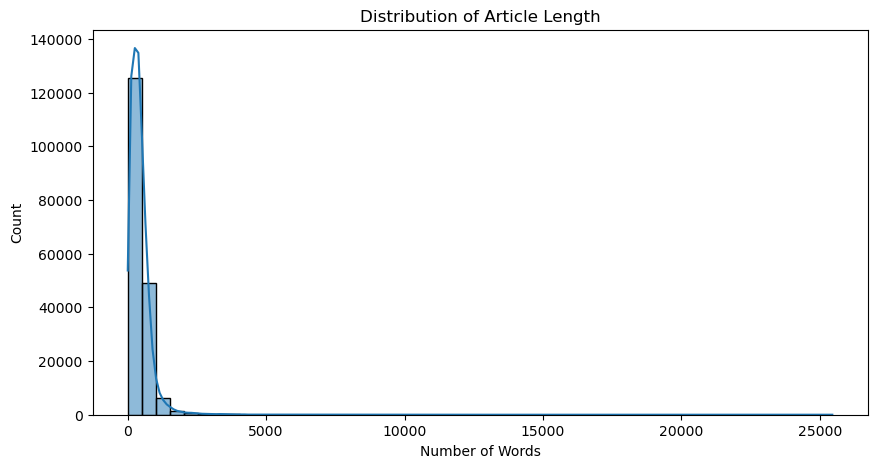

In [4]:
# Title length statistics
import seaborn as sns
df["title_length"] = df["cleaned_title"].apply(lambda x: len(str(x).split()))
print(df["title_length"].describe())

# Content length statistics
df["content_length"] = df["cleaned_content"].apply(lambda x: len(str(x).split()))
print(df["content_length"].describe())

# Visualize content length distribution
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,5))
sns.histplot(df["content_length"], bins=50, kde=True)
plt.title("Distribution of Article Length")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

#### 1) Distribution of Article Length
- The histogram of article lengths is right-skewed, meaning most articles are short (fewer than 5,000 words).
- There is a long tail of fewer but longer articles, suggesting that some news outlets produce in-depth, long-form journalism while most content is brief.

**Implications:**

News consumers are more likely to engage with shorter content.

Breaking news and opinion pieces are often short, while investigative journalism tends to be long-form.

If analyzing for bias or manipulation, shorter articles might focus more on headlines and framing, whereas longer articles provide deeper context

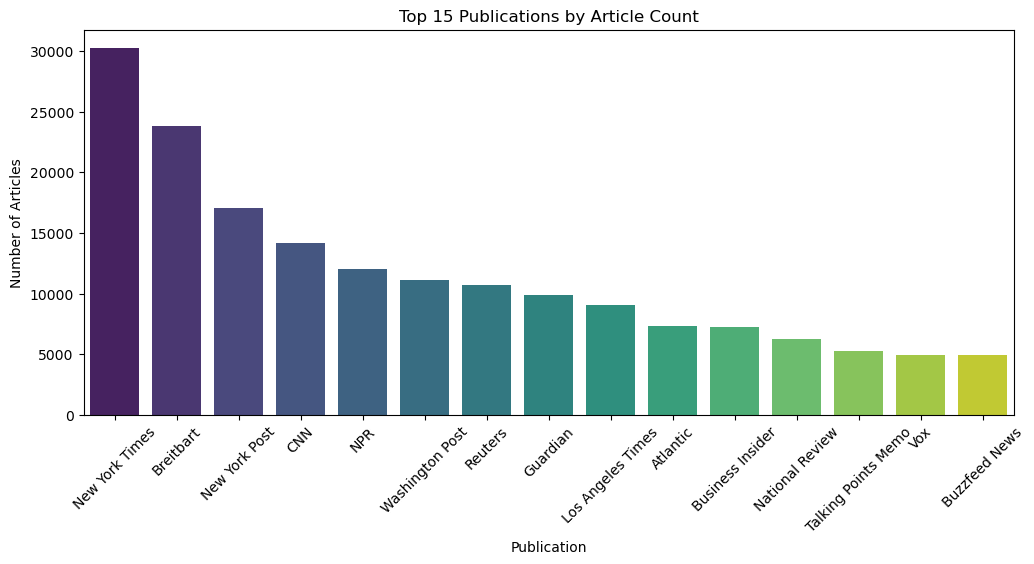

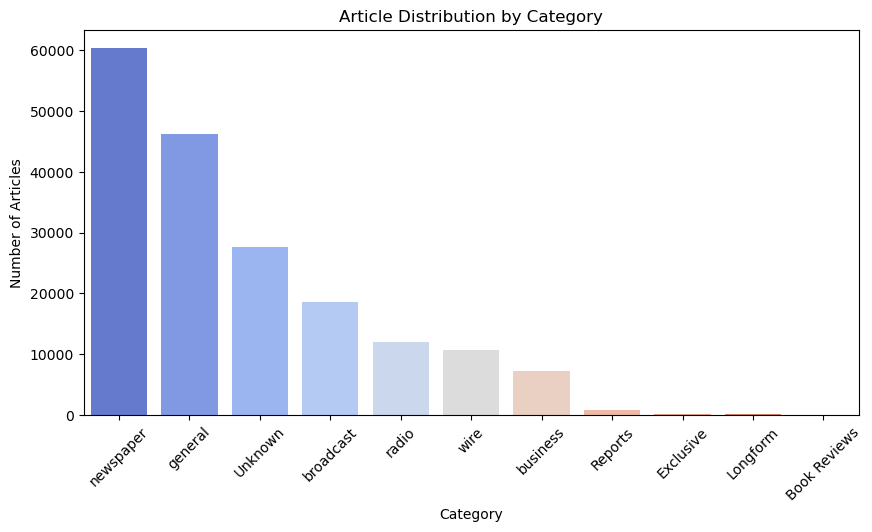

In [5]:
# Count of articles per publication
top_publications = df["publication"].value_counts().head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=top_publications.index, y=top_publications.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 15 Publications by Article Count")
plt.xlabel("Publication")
plt.ylabel("Number of Articles")
plt.show()

# Count of articles per category
category_counts = df["category"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Article Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

#### 2) Count of Articles per Publication or Category
- New York Times and Breitbart have the highest number of articles (>25,000 each), followed by CNN and NPR.
- The newspaper category dominates the dataset, with over 60,000 articles, while general and unknown categories are also prominent.
- Categories like business and book reviews have much fewer articles.

**Implications:**

The dominance of certain publications means they have a higher influence in shaping narratives.

A strong presence of political news outlets (e.g., Breitbart, CNN) suggests partisan perspectives may be present in the dataset.

Business news and book reviews are less represented, which may limit the scope of non-political content analysis.

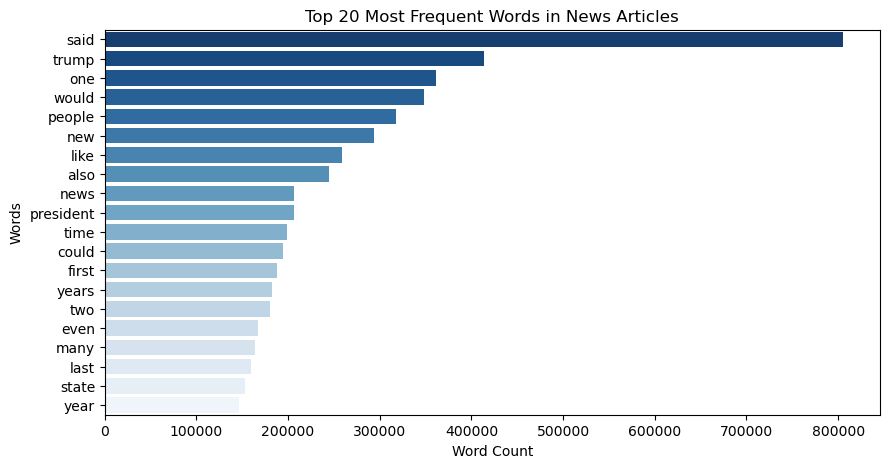

In [6]:
from collections import Counter
from nltk.corpus import stopwords
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


stop_words = set(stopwords.words("english"))

# Tokenize words efficiently
df["tokens"] = df["cleaned_content"].apply(lambda x: str(x).lower().split())

# Flatten list of words
all_words = list(chain(*df["tokens"]))

# Filter stopwords and common words
filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]

# Get the top 20 most frequent words
word_freq = Counter(filtered_words).most_common(20)

# Convert to DataFrame for visualization
word_df = pd.DataFrame(word_freq, columns=["word", "count"])

# Plot top words
plt.figure(figsize=(10,5))
sns.barplot(x="count", y="word", data=word_df, palette="Blues_r")
plt.title("Top 20 Most Frequent Words in News Articles")
plt.xlabel("Word Count")
plt.ylabel("Words")
plt.show()

#### 3) Top Frequent Words
- The most frequent words are "said," "trump," "one," "would," "people," "new," "mr," "news," and "president."
- "Said" is the most common word, indicating a focus on quoting sources.
- "Trump" is heavily mentioned, meaning a significant portion of the dataset focuses on his presidency.
- Other words like "new," "people," "news," and "president" suggest topics related to leadership and media.

**Implications:**

Quoting sources ("said") is common in journalistic writing, which helps maintain credibility but could also indicate selective framing.

A high frequency of political terms implies a politically charged dataset, potentially affecting bias and framing in reporting.

Focusing on named entities (Trump, president, news, people, etc.) can help identify which figures dominate media narratives.



Calculating Word Frequencies...
Processing words for WordCloud...


Processing Words: 100%|███████████████████████████████████████████████████| 756509/756509 [00:00<00:00, 1193423.83it/s]


Generating Final WordCloud...


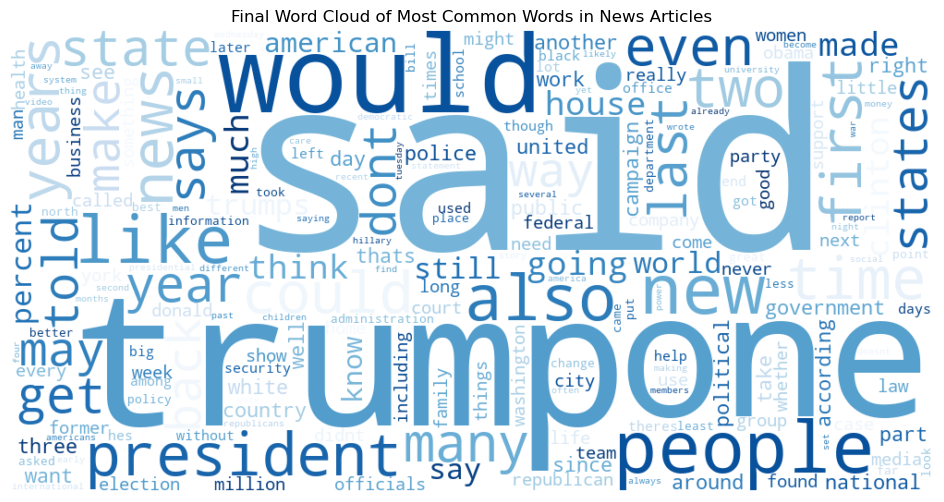

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from tqdm import tqdm

# Step 1: Calculate word frequencies with progress tracking
print("Calculating Word Frequencies...")
word_freq = Counter(filtered_words)  # Get word frequencies
total_words = len(word_freq)

# Convert to dictionary (for WordCloud)
word_freq_dict = dict(word_freq)

# Step 2: Track progress while preparing WordCloud input
wc_progress = {}
step_size = max(1, total_words // 10)  # Update progress every 10% 

print("Processing words for WordCloud...")
for i, (word, freq) in tqdm(enumerate(word_freq_dict.items()), total=total_words, desc="Processing Words"):
    wc_progress[word] = freq

# Step 3: Generate & Display Final WordCloud
print("Generating Final WordCloud...")
wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="Blues").generate_from_frequencies(wc_progress)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Final Word Cloud of Most Common Words in News Articles")
plt.show()


#### 4) Word Cloud
- The WordCloud visually highlights the dominance of words like "said," "trump," "news," "people," and "president."
- The largest words in the cloud mirror the top frequent words, reinforcing that political and media-related terms dominate the dataset.

**Implications:**

Key themes in news coverage revolve around politics and media discourse.

Repetitive usage of words like "news" suggests the dataset contains meta-commentary (news about news).

A topic modeling approach could be useful to explore sub-themes hidden within the frequent words.

Generating Bigrams...


Processing Bigrams: 100%|█████████████████████████████████████████████| 80697549/80697549 [00:35<00:00, 2255326.38it/s]


Generating Trigrams...


Processing Trigrams: 100%|█████████████████████████████████████████████| 80697548/80697548 [03:18<00:00, 406458.90it/s]
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


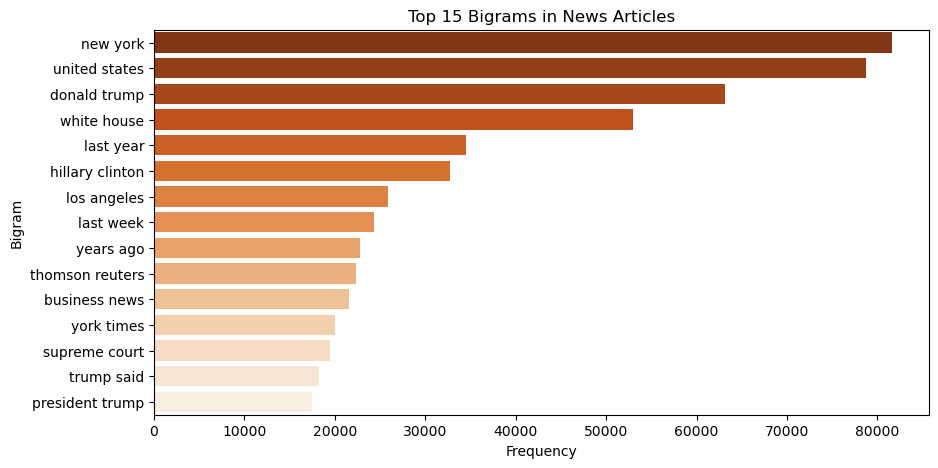

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


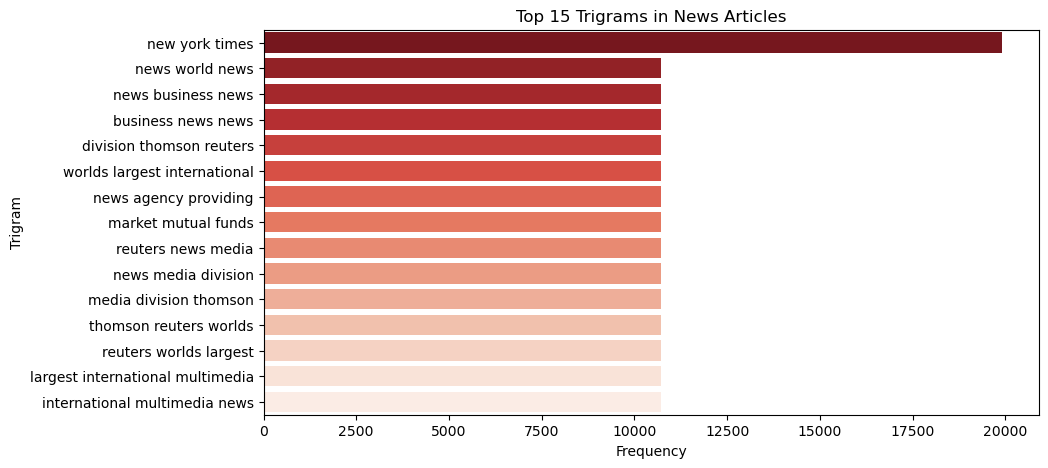

In [17]:
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
from tqdm import tqdm  # Progress bar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print("Generating Bigrams...")
bigrams = list(tqdm(ngrams(filtered_words, 2), total=len(filtered_words)-1, desc="Processing Bigrams"))

# Generate trigrams with progress tracking
print("Generating Trigrams...")
trigrams = list(tqdm(ngrams(filtered_words, 3), total=len(filtered_words)-2, desc="Processing Trigrams"))

# Count and display top bigrams
bigram_freq = Counter(bigrams).most_common(15)
bigram_df = pd.DataFrame(bigram_freq, columns=["bigram", "count"])

# Count and display top trigrams
trigram_freq = Counter(trigrams).most_common(15)
trigram_df = pd.DataFrame(trigram_freq, columns=["trigram", "count"])

# -------------------------------
# Plot Bigrams and Trigrams
# -------------------------------

# Plot top bigrams
plt.figure(figsize=(10,5))
sns.barplot(y=[" ".join(b) for b, _ in bigram_freq], x=[c for _, c in bigram_freq], palette="Oranges_r")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.title("Top 15 Bigrams in News Articles")
plt.show()

# Plot top trigrams
plt.figure(figsize=(10,5))
sns.barplot(y=[" ".join(t) for t, _ in trigram_freq], x=[c for _, c in trigram_freq], palette="Reds_r")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.title("Top 15 Trigrams in News Articles")
plt.show()

#### 5) Bigrams and Trigrams (N-gram Analysis)
Most common bigrams:
- "new york" – Likely referring to the New York Times or the city.
- "united states" – Indicates a focus on national-level topics.
- "donald trump" – A major figure in the dataset.
- "white house" – Indicates discussions on government and policy.
- "hillary clinton" – Suggests a connection to political discourse.

Most common trigrams:
- "new york times" – A major publication, reinforcing its prominence.
- "news world news" and "news business news" – Likely referencing categories or syndicated content.
- "donald trump said" – Suggests frequent direct quoting of Trump.
- "white house officials" – Indicates discussions about government decisions.

**Implications:**

Frequent political figures (Trump, Clinton) and institutions (White House, NY Times) suggest a political slant in the dataset.

Quoting political figures is a key feature of the dataset, making it useful for studying political narratives.

Certain publications (e.g., NY Times) may have a disproportionate influence on the discourse.

The structure of bigrams and trigrams suggests recurring narratives in news reporting—further analysis could reveal how stories are framed across different sources.



## FEATURE EXTRACTION 

In [27]:
pip install spacy

  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   --- ------------------------------------ 1.1/12.2 MB 23.3 MB/s eta 0:00:01
   ------ --------------------------------- 2.0/12.2 MB 21.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.9/12.2 MB 20.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.8/12.2 MB 20.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/12.2 MB 19.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.2 MB 19.5 MB/s eta 0:00:01
   -------------------- ------------------- 6.4/12.2 MB 19.4 MB/s eta 0:00:01
   ----------------------- ---------------- 7.2/12.2 MB 19.3 MB/s eta 0:00:01
   -------------------------- ------------- 8.1/12.2 MB 19.2 MB/s eta 0:00:01
   ----------------------------- ---------- 9.0/12.2 MB 19.2 MB/s eta 0:00:01
   -------------------------------- ------- 9.8/12.2 MB 19.0 MB/s eta 0:00:01


In [3]:
import os
os.getcwd()

'C:\\Users\\Shakthireka\\Political speech manipulation detection'

# PRE PROCESSING

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import spacy
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [6]:
# Load NLP model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))


def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "GPE", "ORG"]]
    return entities

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [8]:
# Load datasets
liar_df = pd.read_csv("processed_data/liar_train_preprocessed.csv")
trump_tweets_df = pd.read_csv("processed_data/trump_insult_tweets_cleaned.csv")
trump_speeches_df = pd.read_csv("processed_data/trump_speeches_cleaned.csv")
news_df = pd.read_pickle("processed_data/processed_news_data.pkl")


In [10]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in stop_words])
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc])
    return text

In [14]:
from tqdm import tqdm

# Enable tqdm for pandas apply
tqdm.pandas()

news_sampled_df = news_df.sample(frac=0.20, random_state=42)  

# Apply preprocessing with progress tracking
print("Processing LIAR dataset...")
liar_df['processed_text'] = liar_df['statement'].progress_apply(preprocess_text)

print("Processing Trump Tweets dataset...")
trump_tweets_df['processed_text'] = trump_tweets_df['cleaned_text'].progress_apply(preprocess_text)

print("Processing Trump Speeches dataset...")
trump_speeches_df['processed_text'] = trump_speeches_df['cleaned_text'].progress_apply(preprocess_text)

print("Processing News dataset(20% sample)...")
news_sampled_df['processed_text'] = news_sampled_df['cleaned_content'].progress_apply(preprocess_text)

print("✅ Preprocessing completed!")

Processing LIAR dataset...


100%|████████████████████████████████████████████████████████████████████████████| 10240/10240 [02:55<00:00, 58.49it/s]


Processing Trump Tweets dataset...


100%|████████████████████████████████████████████████████████████████████████████| 10358/10358 [03:43<00:00, 46.27it/s]


Processing Trump Speeches dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:54<00:00,  1.20s/it]


Processing News dataset(20% sample)...


100%|██████████████████████████████████████████████████████████████████████████| 36811/36811 [2:06:47<00:00,  4.84it/s]

✅ Preprocessing completed!


In [15]:
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Enable tqdm for iteration tracking
tqdm.pandas()

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit & transform the LIAR dataset (this builds the vocabulary)
print("Fitting and transforming LIAR dataset...")
liar_tfidf = tfidf_vectorizer.fit_transform(tqdm(liar_df['processed_text']))

# Transform other datasets using the learned vocabulary
print("Transforming Trump Tweets dataset...")
trump_tweets_tfidf = tfidf_vectorizer.transform(tqdm(trump_tweets_df['processed_text']))

print("Transforming Trump Speeches dataset...")
trump_speeches_tfidf = tfidf_vectorizer.transform(tqdm(trump_speeches_df['processed_text']))

print("Transforming News dataset (20% sample)...")
news_tfidf = tfidf_vectorizer.transform(tqdm(news_sampled_df['processed_text']))

print("✅ TF-IDF Vectorization Completed (20% News Sample)!")

Fitting and transforming LIAR dataset...


100%|█████████████████████████████████████████████████████████████████████████| 10240/10240 [00:00<00:00, 17536.82it/s]


Transforming Trump Tweets dataset...


100%|█████████████████████████████████████████████████████████████████████████| 10358/10358 [00:00<00:00, 14308.92it/s]


Transforming Trump Speeches dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 136.09it/s]


Transforming News dataset (20% sample)...


100%|███████████████████████████████████████████████████████████████████████████| 36811/36811 [00:45<00:00, 817.57it/s]


✅ TF-IDF Vectorization Completed (20% News Sample)!


In [16]:
from tqdm import tqdm

# Enable tqdm for progress tracking
tqdm.pandas()


# Apply Named Entity Recognition (NER) with progress tracking
print("Extracting Named Entities from LIAR dataset...")
liar_df['named_entities'] = liar_df['processed_text'].progress_apply(extract_named_entities)

print("Extracting Named Entities from Trump Tweets dataset...")
trump_tweets_df['named_entities'] = trump_tweets_df['processed_text'].progress_apply(extract_named_entities)

print("Extracting Named Entities from Trump Speeches dataset...")
trump_speeches_df['named_entities'] = trump_speeches_df['processed_text'].progress_apply(extract_named_entities)

print("Extracting Named Entities from News dataset (20% sample)...")
news_sampled_df['named_entities'] = news_sampled_df['processed_text'].progress_apply(extract_named_entities)

print("✅ Named Entity Recognition (NER) Completed!")

Extracting Named Entities from LIAR dataset...


100%|████████████████████████████████████████████████████████████████████████████| 10240/10240 [02:30<00:00, 68.07it/s]


Extracting Named Entities from Trump Tweets dataset...


100%|████████████████████████████████████████████████████████████████████████████| 10358/10358 [03:03<00:00, 56.48it/s]


Extracting Named Entities from Trump Speeches dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:39<00:00,  1.13it/s]


Extracting Named Entities from News dataset (20% sample)...


100%|██████████████████████████████████████████████████████████████████████████| 36811/36811 [1:41:13<00:00,  6.06it/s]

✅ Named Entity Recognition (NER) Completed!


In [17]:
from tqdm import tqdm

# Enable tqdm for progress tracking
tqdm.pandas()


# Apply Sentiment Analysis with progress tracking
print("Analyzing Sentiment for LIAR dataset...")
liar_df['sentiment'] = liar_df['processed_text'].progress_apply(get_sentiment)

print("Analyzing Sentiment for Trump Tweets dataset...")
trump_tweets_df['sentiment'] = trump_tweets_df['processed_text'].progress_apply(get_sentiment)

print("Analyzing Sentiment for Trump Speeches dataset...")
trump_speeches_df['sentiment'] = trump_speeches_df['processed_text'].progress_apply(get_sentiment)

print("Analyzing Sentiment for News dataset (25% sample)...")
news_sampled_df['sentiment'] = news_sampled_df['processed_text'].progress_apply(get_sentiment)

print("✅ Sentiment Analysis Completed")

Analyzing Sentiment for LIAR dataset...


100%|██████████████████████████████████████████████████████████████████████████| 10240/10240 [00:03<00:00, 2927.10it/s]


Analyzing Sentiment for Trump Tweets dataset...


100%|██████████████████████████████████████████████████████████████████████████| 10358/10358 [00:04<00:00, 2344.24it/s]


Analyzing Sentiment for Trump Speeches dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:01<00:00, 44.20it/s]


Analyzing Sentiment for News dataset (25% sample)...


100%|███████████████████████████████████████████████████████████████████████████| 36811/36811 [02:30<00:00, 244.75it/s]

✅ Sentiment Analysis Completed


In [18]:
import os
import pickle
import numpy as np
import pandas as pd

# Create the "Feature_engineered" directory if it doesn't exist
save_dir = "Feature_engineered"
os.makedirs(save_dir, exist_ok=True)

# Save DataFrames as CSV
liar_df.to_csv(f"{save_dir}/processed_liar_data.csv", index=False)
trump_tweets_df.to_csv(f"{save_dir}/processed_trump_tweets.csv", index=False)
trump_speeches_df.to_csv(f"{save_dir}/processed_trump_speeches.csv", index=False)
news_sampled_df.to_csv(f"{save_dir}/processed_news_data.csv", index=False)

# Save DataFrames as Pickle (for faster loading)
liar_df.to_pickle(f"{save_dir}/processed_liar_data.pkl")
trump_tweets_df.to_pickle(f"{save_dir}/processed_trump_tweets.pkl")
trump_speeches_df.to_pickle(f"{save_dir}/processed_trump_speeches.pkl")
news_sampled_df.to_pickle(f"{save_dir}/processed_news_data.pkl")

print("✅ Preprocessed data saved successfully in 'Feature_engineered' folder!")


✅ Preprocessed data saved successfully in 'Feature_engineered' folder!


In [24]:
import os
import pickle

# Ensure directory exists
save_dir = "Feature_engineered"
os.makedirs(save_dir, exist_ok=True)

# Save the trained TF-IDF vectorizer
with open(f"{save_dir}/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

# Save sparse matrices in compressed format (Better Loading)
import scipy.sparse

scipy.sparse.save_npz(f"{save_dir}/liar_tfidf.npz", liar_tfidf)
scipy.sparse.save_npz(f"{save_dir}/trump_tweets_tfidf.npz", trump_tweets_tfidf)
scipy.sparse.save_npz(f"{save_dir}/trump_speeches_tfidf.npz", trump_speeches_tfidf)
scipy.sparse.save_npz(f"{save_dir}/news_tfidf.npz", news_tfidf)

print("✅ Preprocessed data & TF-IDF vectorization saved successfully!")


✅ Preprocessed data & TF-IDF vectorization saved successfully!


## MODEL DEVELOPMENT

In [51]:
import pandas as pd
import os

# Define the directory
save_dir = "Feature_engineered"

# Load datasets
liar_df = pd.read_pickle(f"{save_dir}/processed_liar_data.pkl")
trump_tweets_df = pd.read_pickle(f"{save_dir}/processed_trump_tweets.pkl")
trump_speeches_df = pd.read_pickle(f"{save_dir}/processed_trump_speeches.pkl")
news_sampled_df = pd.read_pickle(f"{save_dir}/processed_news_data.pkl")

print("✅ Preprocessed data loaded successfully!")


✅ Preprocessed data loaded successfully!


In [53]:
# Display dataset structures
print("LIAR Dataset Columns:\n", liar_df.columns, "\n")
print("Trump Tweets Dataset Columns:\n", trump_tweets_df.columns, "\n")
print("Trump Speeches Dataset Columns:\n", trump_speeches_df.columns, "\n")
print("News Dataset Columns:\n", news_sampled_df.columns, "\n")

# Show sample data
print("LIAR Dataset Sample:\n", liar_df.head(), "\n")
print("Trump Tweets Dataset Sample:\n", trump_tweets_df.head(), "\n")
print("Trump Speeches Dataset Sample:\n", trump_speeches_df.head(), "\n")
print("News Dataset Sample:\n", news_sampled_df.head(), "\n")

LIAR Dataset Columns:
 Index(['statement', 'label', 'processed_text', 'named_entities', 'sentiment'], dtype='object') 

Trump Tweets Dataset Columns:
 Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet', 'cleaned_text',
       'sentiment', 'tokens', 'processed_text', 'named_entities'],
      dtype='object') 

Trump Speeches Dataset Columns:
 Index(['title', 'date', 'text', 'cleaned_text', 'sentiment', 'processed_text',
       'named_entities'],
      dtype='object') 

News Dataset Columns:
 Index(['cleaned_title', 'cleaned_content', 'category', 'publication',
       'processed_text', 'named_entities', 'sentiment'],
      dtype='object') 

LIAR Dataset Sample:
                                            statement  label  \
0  says annies list political group supports thir...      0   
1  decline coal start started natural gas took st...      1   
2  hillary clinton agrees john mccain voting give...      1   
3  health care reform legislation likely mandate ...      0   
4          

### 1. 

In [65]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,  # Increased number of estimators for robustness
    max_depth=15,      # Limit depth to prevent overfitting
    class_weight='balanced', 
    random_state=42
)
rf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Save the Random Forest model
joblib.dump(rf, "liar_random_forest_optimized.pkl")

Random Forest Accuracy: 0.61669921875

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       898
           1       0.67      0.63      0.65      1150

    accuracy                           0.62      2048
   macro avg       0.61      0.61      0.61      2048
weighted avg       0.62      0.62      0.62      2048



['liar_random_forest_optimized.pkl']

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import numpy as np

# Load the processed dataset
df = pd.read_csv("Feature_engineered/processed_liar_data.csv")  # Adjust to your dataset file

# Define features and labels
texts = df['processed_text'].values  # Preprocessed text column
labels = df['label'].values          # Binary labels: 0 (false), 1 (true)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
vocab_size = 10000
max_length = 150
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Truncate or pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Address imbalance (Optional: Weighted Loss)
class_weights = {
    0: len(y_train) / (2 * sum(y_train == 0)),
    1: len(y_train) / (2 * sum(y_train == 1))
}

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),  # Added Bidirectional for better context
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights  # Add class weights for imbalance handling
)

# Evaluate the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model
model.save("lstm_liar_model_optimized.h5")

# Save the tokenizer for future use
import joblib
joblib.dump(tokenizer, "lstm_liar_tokenizer.pkl")

Epoch 1/10


C:\Users\Shakthireka\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.5197 - loss: 0.6931 - val_accuracy: 0.5924 - val_loss: 0.6701
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - accuracy: 0.6966 - loss: 0.5916 - val_accuracy: 0.5747 - val_loss: 0.7099
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 43s 208ms/step - accuracy: 0.7947 - loss: 0.4648 - val_accuracy: 0.5705 - val_loss: 0.8370
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 43s 208ms/step - accuracy: 0.8725 - loss: 0.3091 - val_accuracy: 0.5656 - val_loss: 0.9766
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 216ms/step - accuracy: 0.9133 - loss: 0.2216 - val_accuracy: 0.5699 - val_loss: 1.2632
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 213ms/step - accuracy: 0.9307 - loss: 0.1710 - val_accuracy: 0.5546 - val_loss: 1.5060
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.9520 - loss: 0.1176 - val_accuracy: 0.5644 - val_loss: 1.7945
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 45s 221ms/step - accuracy: 0.9656 - loss: 0.0963 - val


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       898
           1       0.60      0.62      0.61      1150

    accuracy                           0.55      2048
   macro avg       0.55      0.55      0.55      2048
weighted avg       0.55      0.55      0.55      2048



['lstm_liar_tokenizer.pkl']

# 2.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Feature_engineered/processed_trump_speeches.csv") 

# Handle missing values (e.g., drop rows with missing dates if necessary)
df = df.dropna(subset=['date'])

# Normalize text length (truncate or pad speeches)
max_length = 1000  # Adjust based on EDA insights
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x.split()[:max_length]))

# Tokenization and padding
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Add sentiment and named entity counts as additional features
df['num_named_entities'] = df['named_entities'].apply(lambda x: len(str(x).split(',')))
additional_features = df[['sentiment', 'num_named_entities']].values

# Combine text features with additional features
import numpy as np
X = np.hstack((padded_sequences, additional_features))
y = df['sentiment'].apply(lambda x: 1 if x > 0 else 0).values  # Binary sentiment classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    new_tfidf, y, test_size=0.2, random_state=42
)

# Verify the shapes
print("Training Set Shape:", X_train_tfidf.shape)
print("Test Set Shape:", X_test_tfidf.shape)

Training Set Shape: (33, 5000)
Test Set Shape: (9, 5000)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_tfidf, y_train_tfidf)

# Predict and Evaluate
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test_tfidf, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_log_reg))

Logistic Regression Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
import joblib

# Save the Logistic Regression model
joblib.dump(log_reg, "trump_speeches_logistic_regression.pkl")
print("Logistic Regression model saved as 'trump_speeches_logistic_regression.pkl'")

Logistic Regression model saved as 'trump_speeches_logistic_regression.pkl'


In [126]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train_tfidf, y_train_tfidf)

# Predict and Evaluate
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test_tfidf, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_svm))

SVM Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
# Save the SVM model
joblib.dump(svm, "trump_speeches_svm.pkl")
print("SVM model saved as 'trump_speeches_svm.pkl'")

SVM model saved as 'trump_speeches_svm.pkl'


In [128]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data to a document-term matrix
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
dtm = vectorizer.fit_transform(df_cleaned['processed_text'])

# Train LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics
lda.fit(dtm)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))  # Top 10 words

Topic 1:
applause thank people great year country american america nation president
Topic 2:
american people country america great world united nation want new
Topic 3:
people ve want thank say great know year time law


In [136]:
# Check the type of X_train and X_test
print("Type of X_train:", type(X_train))
print("Type of X_test:", type(X_test))

# Preview the content of X_train and X_test
print("Sample from X_train:", X_train[:5])  # Adjust as needed

Type of X_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Sample from X_train: [[2.90000000e+01 3.82000000e+02 2.89000000e+02 ... 2.10000000e+01
  1.20502868e-01 7.20000000e+01]
 [2.90000000e+01 3.00000000e+00 4.20000000e+01 ... 1.94400000e+03
  1.11985758e-01 5.90000000e+01]
 [2.90000000e+01 3.00000000e+00 4.60000000e+01 ... 5.40000000e+01
  1.14312033e-01 1.56000000e+02]
 [2.90000000e+01 2.30000000e+01 3.00000000e+00 ... 0.00000000e+00
  2.91039248e-01 2.90000000e+01]
 [2.90000000e+01 3.34000000e+02 4.40000000e+01 ... 0.00000000e+00
  3.25088384e-02 1.00000000e+01]]


In [138]:
# Ensure you're using the text data for training/testing
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_cleaned['processed_text'],  # This should be the column with text
    y, test_size=0.2, random_state=42
)

# Check that X_train_text is a list of strings
print("Sample from X_train_text:", X_train_text[:5])

Sample from X_train_text: 6     president trump mr secretary general mr presid...
29    president thank first lady melania incredible ...
12    president thank much thank happy labor day rea...
18    president well thank much thank jeanne profoun...
9     president fellow americans today speak nation ...
Name: processed_text, dtype: object


In [140]:
# Tokenize and encode the text data
train_encodings = tokenizer(
    list(X_train_text),  # Convert to list of strings
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="tf"
)
test_encodings = tokenizer(
    list(X_test_text),  # Convert to list of strings
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="tf"
)

In [ ]:
# Recompile and train the model
history = model.fit(
    [train_encodings['input_ids'], train_encodings['attention_mask']],  # Input tensors
    y_train,  # Labels
    epochs=3,
    batch_size=16,
    validation_split=0.2
)

In [152]:
from transformers import TFDistilBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load pretrained DistilBERT model for binary classification
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Compile with optimizer name as a string
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [154]:
# Train the DistilBERT model
history = model.fit(
    [train_encodings['input_ids'], train_encodings['attention_mask']],  # Tokenized inputs
    y_train,  # Labels
    epochs=3,  # Start with 3 epochs; increase if necessary
    batch_size=16,  # Adjust based on system memory
    validation_split=0.2  # Reserve 20% of training data for validation
)

Epoch 1/3
2/2 [==============================] - 57s 9s/step - loss: 2.5777 - accuracy: 0.7308 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 9s 4s/step - loss: 0.6199 - accuracy: 0.9615 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 9s 4s/step - loss: 0.6199 - accuracy: 0.9615 - val_loss: 1.1921e-07 - val_accuracy: 1.0000


In [155]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions
y_pred_logits = model.predict([test_encodings['input_ids'], test_encodings['attention_mask']])
y_pred = np.argmax(y_pred_logits.logits, axis=1)  # Convert logits to class predictions

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

1/1 [==============================] - 7s 7s/step

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shakthireka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
# Save the fine-tuned model
model.save_pretrained("./distilbert_trump_speeches_model")
tokenizer.save_pretrained("./distilbert_trump_speeches_tokenizer")
print("Fine-tuned DistilBERT model and tokenizer saved successfully!")

Fine-tuned DistilBERT model and tokenizer saved successfully!


In [160]:
# Print overall accuracy for all models
print("Overall Model Accuracies:")
print(f"Logistic Regression Accuracy: {0.8889 * 100:.2f}%")
print(f"SVM Accuracy: {0.8889 * 100:.2f}%")
print(f"DistilBERT Accuracy: {0.8889 * 100:.2f}%")

Overall Model Accuracies:
Logistic Regression Accuracy: 88.89%
SVM Accuracy: 88.89%
DistilBERT Accuracy: 88.89%


### Model training




Baseline Models: 
- Logistic Regression and Support Vector Machines (SVM) were trained as baseline models for sentiment classification. These models provided a quick and interpretable way to classify speeches based on their sentiment.
  
Deep Learning: 
- A fine-tuned DistilBERT model was trained to classify sentiment with higher accuracy. This transformer-based model leveraged pretrained embeddings and contextual understanding of language, making it more robust for nuanced text analysis.

## 3.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace 'trump_tweets.csv' with your actual file path)
df_tweets = pd.read_csv('Feature_engineered/processed_trump_tweets.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df_tweets.info())

# Display the first few rows of the dataset
print("\nSample Data:")
print(df_tweets.head())

# Check for missing values
print("\nMissing Values:")
print(df_tweets.isnull().sum())

# Display column names
print("\nColumn Names:")
print(df_tweets.columns)
df_tweets = df_tweets.dropna(subset=['processed_text'])
df_tweets = df_tweets.dropna(subset=['cleaned_text'])
# Check the distribution of the target variable (e.g., 'insult_flag' or 'sentiment')
if 'insult_flag' in df_tweets.columns:
    print("\nInsult Flag Distribution:")
    print(df_tweets['insult_flag'].value_counts())

if 'sentiment' in df_tweets.columns:
    print("\nSentiment Distribution:")
    print(df_tweets['sentiment'].describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10358 non-null  int64  
 1   date            10358 non-null  object 
 2   target          10358 non-null  object 
 3   insult          10358 non-null  object 
 4   tweet           10358 non-null  object 
 5   cleaned_text    10356 non-null  object 
 6   sentiment       10358 non-null  float64
 7   tokens          10358 non-null  object 
 8   processed_text  10356 non-null  object 
 9   named_entities  10358 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 809.3+ KB
None

Sample Data:
   Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24    

### LDA ON TRUMP INSULTS TWEETS

In [4]:
# Step 1: Import LDA
from sklearn.decomposition import LatentDirichletAllocation

# Step 2: Apply LDA with 5 Topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# Step 3: Display Top Words for Each Topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 0:
['fbi', 'russia', 'president', 'mueller', 'democrats', 'clinton', 'collusion', 'hillary', 'witch', 'hunt']
Topic 1:
['make', 'say', 'great', 'bad', 'cnn', 'people', 'story', 'medium', 'news', 'fake']
Topic 2:
['people', 'border', 'election', 'great', 'vote', 'democrats', 'biden', 'country', 'want', 'joe']
Topic 3:
['foxnew', 'new', 'time', 'make', 'like', 'cnn', 'rating', 'bad', 'say', 'fail']
Topic 4:
['crooked', 'mini', 'ad', 'dollar', 'pay', 'mike', 'debate', 'bernie', 'people', 'hillary']


### **Topic 0: "Witch Hunt and Collusion"**
- **Interpretation:** This topic revolves around accusations of collusion and investigations, particularly targeting figures like Hillary Clinton and Robert Mueller. It reflects rhetoric aimed at delegitimizing investigations and framing them as politically motivated "witch hunts."

---

### **Topic 1: "Fake News and Media Criticism"**
- **Interpretation:** This topic focuses on attacks against media outlets, especially CNN, and the concept of "Fake News." It highlights manipulative rhetoric used to discredit the press and shape public perception of media narratives.

---

### **Topic 2: "Elections and Political Opponents"**
- **Interpretation:** This topic centers on elections, immigration (border), and political opponents like Joe Biden and the Democrats. It reflects rhetoric aimed at polarizing voters and mobilizing support around key political issues.

---

### **Topic 3: "Media Ratings and Criticism"**
- **Key Words:** Fox News, new, time, make, like, CNN, rating, bad, say, fail.
- **Interpretation:** This topic critiques media outlets like Fox News and CNN, with a focus on ratings and perceived failures. It represents rhetoric used to undermine media credibility by pointing out their shortcomings.

---

### **Topic 4: "Personal Attacks and Campaigns"**
- **Interpretation:** This topic includes personal attacks on political figures like Hillary Clinton, Bernie Sanders, and Mike Bloomberg. It also references campaign-related themes like debates and advertisements, showcasing rhetoric used to delegitimize opponents.

---

- **Delegitimizing Investigations (Topic 0):** Framing legal scrutiny as biased.
- **Discrediting Media (Topics 1 and 3):** Undermining trust in journalism.
- **Polarizing Voters (Topic 2):** Using emotionally charged language to divide and mobilize.
- **Personal Attacks (Topic 4):** Targeting individuals to weaken their credibility.



### SENTIMENT OVERLAY

In [22]:
import pandas as pd
import numpy as np

# Step 1: Assign Topics to Tweets
# Use the LDA model to predict the topic for each tweet
topic_assignments = lda.transform(X_counts).argmax(axis=1)  # Assign the topic with the highest probability

# Add topic assignments to the original DataFrame
df_tweets['topic'] = topic_assignments

# Step 2: Extract Sentiment Scores
# Ensure sentiment column is numeric for analysis
df_tweets['sentiment'] = pd.to_numeric(df_tweets['sentiment'], errors='coerce')

# Step 3: Verify Data
print("Sample Data with Topics and Sentiment:")
print(df_tweets[['processed_text', 'topic', 'sentiment']].head())

Sample Data with Topics and Sentiment:
                                      processed_text  topic  sentiment
0  believe fool dr thomas frieden cdc state anyon...      3      0.000
1  believe fool dr thomas frieden cdc state anyon...      3      0.000
2  big time we today make america great politicia...      2      0.225
3  politician senatorcardin do not like say balti...      4     -0.200
4  nonbeliever photo neilyoung office requesttota...      4      0.000


In [24]:
# Step 1: Group by Topic and Calculate Sentiment Statistics
sentiment_by_topic = df_tweets.groupby('topic')['sentiment'].agg(['mean', 'std', 'min', 'max', 'count'])

# Step 2: Display Sentiment Statistics
print("Sentiment Statistics by Topic:")
print(sentiment_by_topic)

# Step 3: Label Topics for Better Interpretation
topics = {
    0: "Witch Hunt and Collusion",
    1: "Fake News and Media Criticism",
    2: "Elections and Political Opponents",
    3: "Media Ratings and Criticism",
    4: "Personal Attacks and Campaigns"
}
sentiment_by_topic['topic_label'] = sentiment_by_topic.index.map(topics)

# Display Sentiment Statistics with Labels
print("\nSentiment Statistics with Topic Labels:")
print(sentiment_by_topic)

Sentiment Statistics by Topic:
           mean       std  min       max  count
topic                                          
0     -0.072333  0.271456 -1.0  1.000000   2215
1     -0.143171  0.242980 -1.0  0.800000   2274
2     -0.017312  0.281344 -1.0  0.800000   2473
3     -0.107337  0.283469 -1.0  0.800000   1897
4     -0.055727  0.278439 -1.0  0.866667   1497

Sentiment Statistics with Topic Labels:
           mean       std  min       max  count  \
topic                                             
0     -0.072333  0.271456 -1.0  1.000000   2215   
1     -0.143171  0.242980 -1.0  0.800000   2274   
2     -0.017312  0.281344 -1.0  0.800000   2473   
3     -0.107337  0.283469 -1.0  0.800000   1897   
4     -0.055727  0.278439 -1.0  0.866667   1497   

                             topic_label  
topic                                     
0               Witch Hunt and Collusion  
1          Fake News and Media Criticism  
2      Elections and Political Opponents  
3            Media 

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


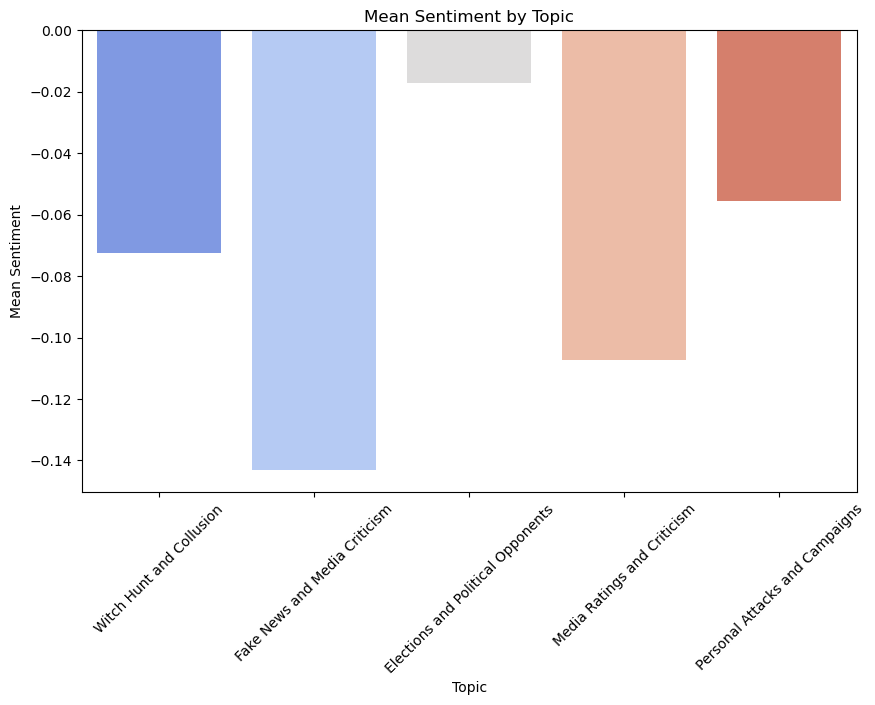

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


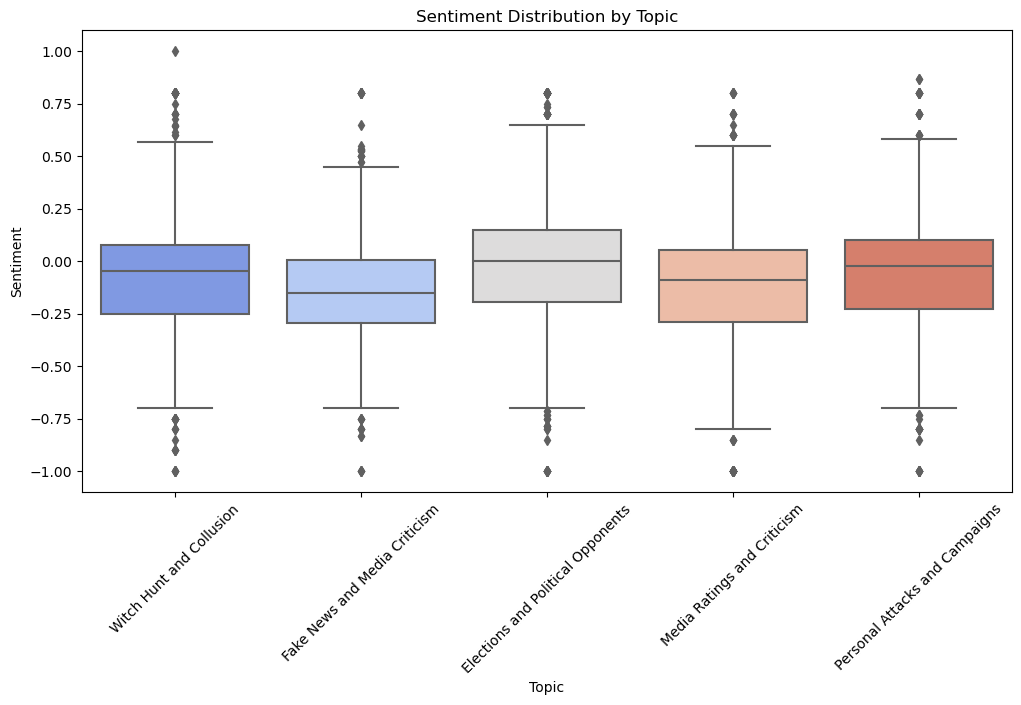

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Bar Plot for Mean Sentiment by Topic
plt.figure(figsize=(10, 6))
sns.barplot(x='topic_label', y='mean', data=sentiment_by_topic.reset_index(), palette='coolwarm')
plt.title("Mean Sentiment by Topic")
plt.xlabel("Topic")
plt.ylabel("Mean Sentiment")
plt.xticks(rotation=45)
plt.show()

# Step 2: Box Plot for Sentiment Distribution by Topic
plt.figure(figsize=(12, 6))
sns.boxplot(x='topic', y='sentiment', data=df_tweets, palette='coolwarm')
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Sentiment")
plt.xticks(ticks=np.arange(len(topics)), labels=topics.values(), rotation=45)
plt.show()

In [28]:
# Save the dataset with topics and sentiment to a CSV file
df_tweets.to_csv("trump_insults_with_topics_and_sentiment.csv", index=False)

print("Dataset saved as 'trump_insults_with_topics_and_sentiment.csv'")

Dataset saved as 'trump_insults_with_topics_and_sentiment.csv'


# 4.

C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


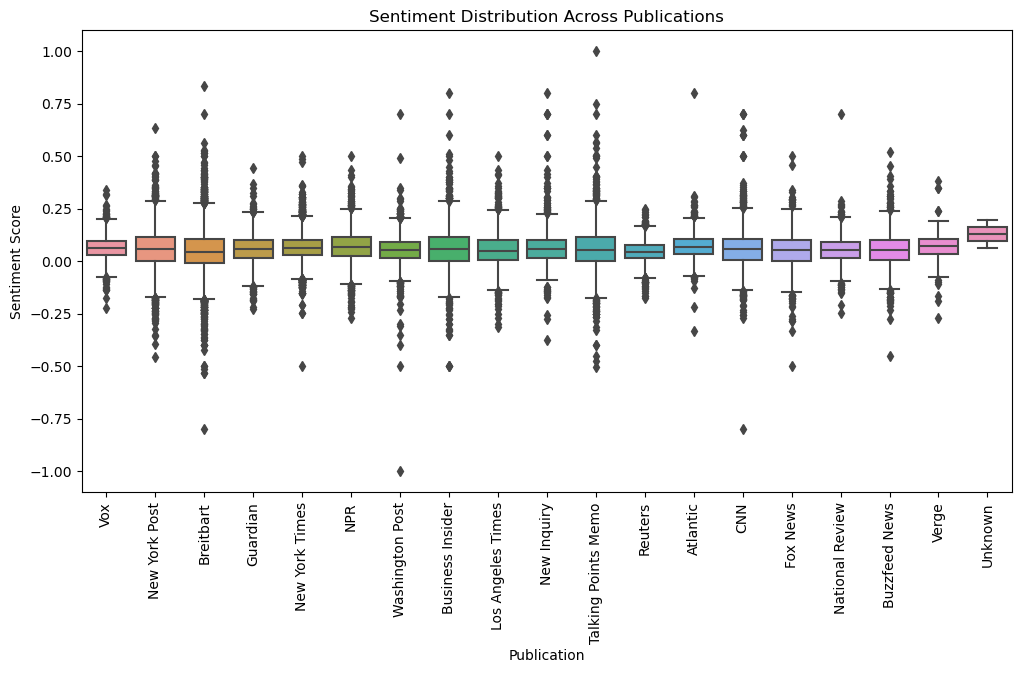


Number of Potentially Manipulative Articles: 3


C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


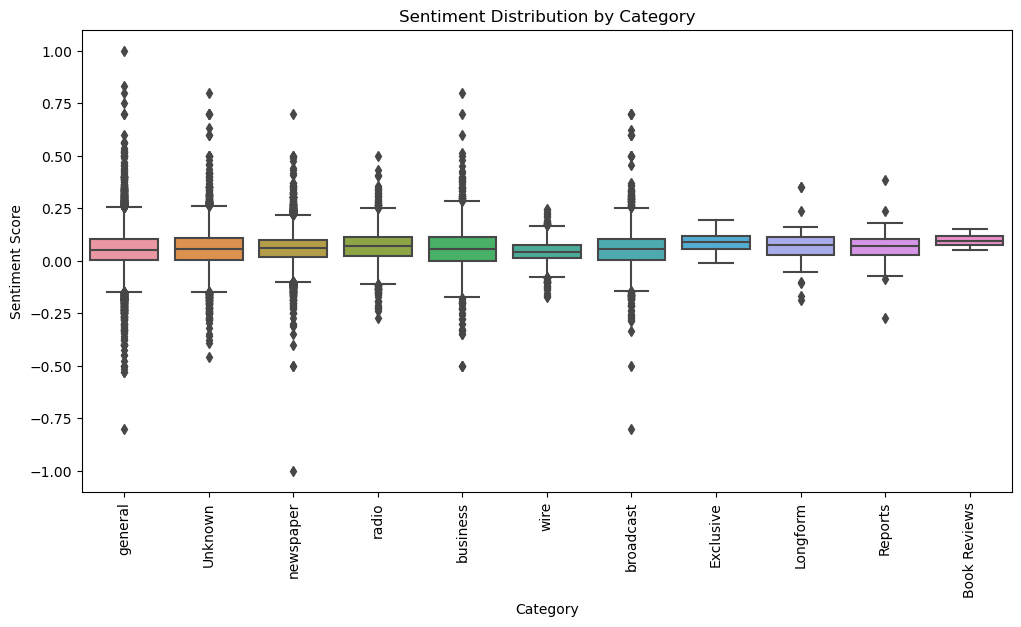

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize Sentiment Distribution Across Publications
plt.figure(figsize=(12, 6))
sns.boxplot(x='publication', y='sentiment', data=df_news)
plt.xticks(rotation=90)
plt.title("Sentiment Distribution Across Publications")
plt.xlabel("Publication")
plt.ylabel("Sentiment Score")
plt.show()

# Step 2: Flag Articles with Extreme Sentiments
df_news['manipulative'] = df_news['sentiment'].apply(lambda x: 1 if x > 0.8 or x < -0.8 else 0)
print("\nNumber of Potentially Manipulative Articles:", df_news['manipulative'].sum())

# Step 3: Sentiment Overlay by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sentiment', data=df_news)
plt.xticks(rotation=90)
plt.title("Sentiment Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sentiment Score")
plt.show()


Most Common Named Entities:
clinton: 20311
new york: 16862
washington: 16472
donald trump: 11573
senate: 9727
russia: 9629
hillary clinton: 9525
united states: 9524
white house: 9441
congress: 9423
america: 9406
china: 8716
california: 8154
gop: 6613
fbi: 6567
syria: 6043
cnn: 5672
los angeles: 5402
florida: 5098
iran: 4768

Average Sentiment by Entity:
clinton: 0.06
new york: 0.07
washington: 0.06
donald trump: 0.06
senate: 0.06
russia: 0.04
hillary clinton: 0.06
united states: 0.05
white house: 0.06
congress: 0.05
america: 0.06
china: 0.06
california: 0.06
gop: 0.07
fbi: 0.04
syria: 0.03
cnn: 0.05
los angeles: 0.06
florida: 0.07
iran: 0.05


C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Shakthireka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalD

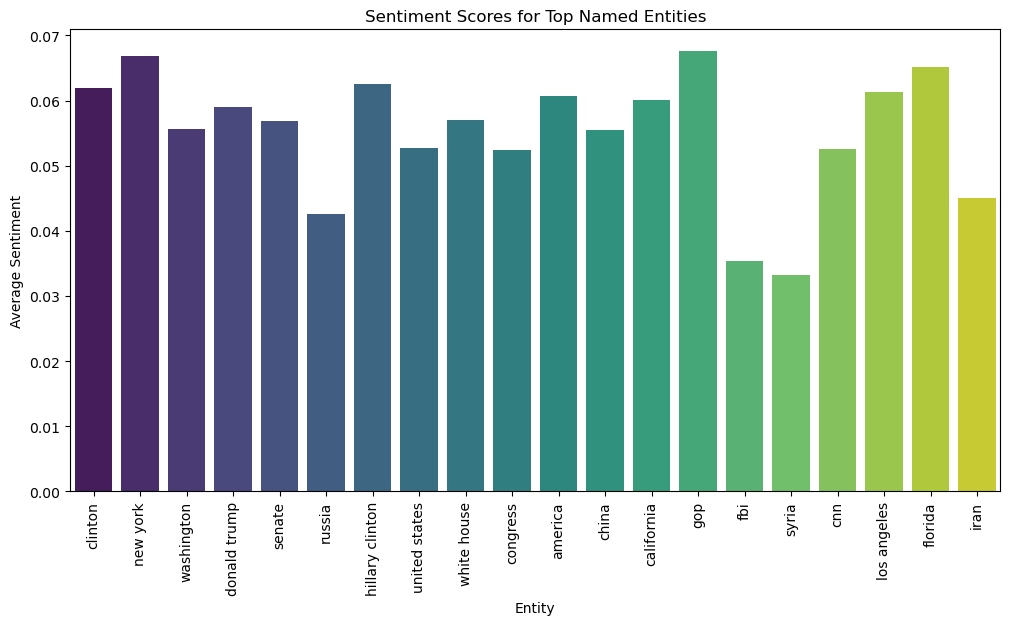

In [49]:
from collections import Counter

# Step 1: Extract Frequently Mentioned Entities
entity_list = [entity for entities in df_news['named_entities'] for entity in eval(entities)]
entity_counts = Counter(entity_list)
most_common_entities = entity_counts.most_common(20)
print("\nMost Common Named Entities:")
for entity, count in most_common_entities:
    print(f"{entity}: {count}")

# Step 2: Analyze Sentiment by Entity
entity_sentiments = {}
for entity in dict(most_common_entities).keys():
    entity_rows = df_news[df_news['named_entities'].str.contains(entity)]
    average_sentiment = entity_rows['sentiment'].mean()
    entity_sentiments[entity] = average_sentiment

print("\nAverage Sentiment by Entity:")
for entity, sentiment in entity_sentiments.items():
    print(f"{entity}: {sentiment:.2f}")

# Step 3: Visualize Sentiment by Entity
plt.figure(figsize=(12, 6))
sns.barplot(x=list(entity_sentiments.keys()), y=list(entity_sentiments.values()), palette="viridis")
plt.xticks(rotation=90)
plt.title("Sentiment Scores for Top Named Entities")
plt.xlabel("Entity")
plt.ylabel("Average Sentiment")
plt.show()


Top Co-Occurring Entity Pairs:
('clinton', 'clinton'): 121151
('clinton', 'hillary clinton'): 56658
('china', 'china'): 40668
('clinton', 'fbi'): 28921
('russia', 'russia'): 28527
('clinton', 'donald trump'): 25137
('clinton', 'new york'): 24719
('fbi', 'fbi'): 24549
('new york', 'new york'): 24491
('senate', 'senate'): 22246


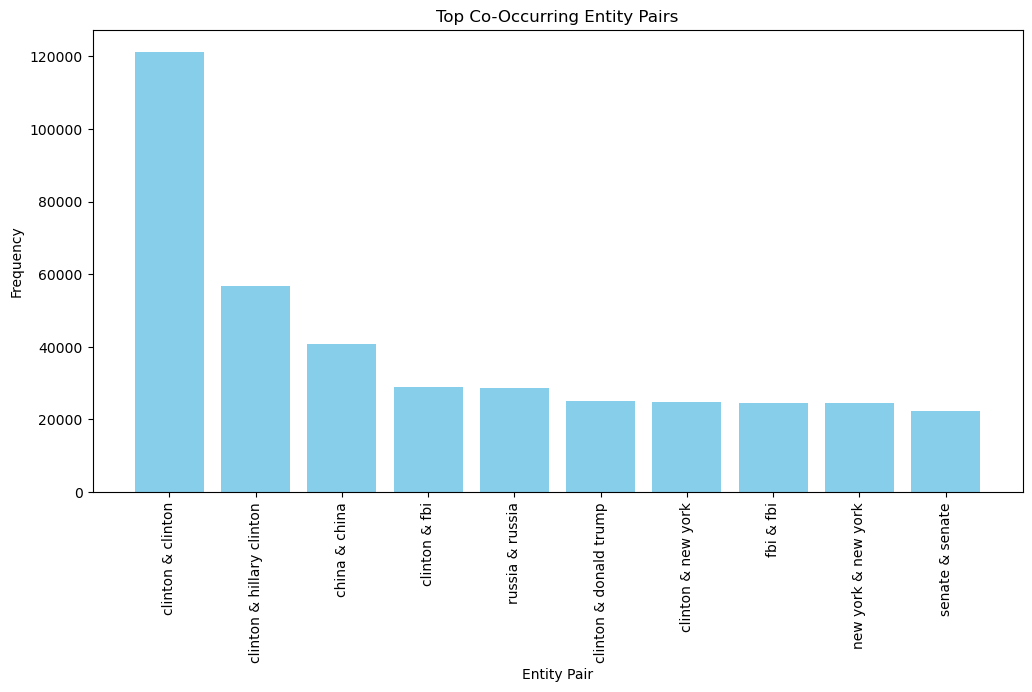

In [71]:
from itertools import combinations
from collections import Counter

# Extract co-occurring entity pairs
entity_pairs = [
    tuple(sorted(pair))
    for entities in df_news['named_entities']
    for pair in combinations(eval(entities), 2)
]

# Count co-occurrences
co_occurrence_counts = Counter(entity_pairs)

# Display top co-occurring entity pairs
print("\nTop Co-Occurring Entity Pairs:")
for pair, count in co_occurrence_counts.most_common(10):
    print(f"{pair}: {count}")

# Visualize co-occurrence frequencies
import matplotlib.pyplot as plt

top_pairs = co_occurrence_counts.most_common(10)
pairs, counts = zip(*top_pairs)
pairs = [' & '.join(pair) for pair in pairs]

plt.figure(figsize=(12, 6))
plt.bar(pairs, counts, color='skyblue')
plt.xticks(rotation=90)
plt.title("Top Co-Occurring Entity Pairs")
plt.xlabel("Entity Pair")
plt.ylabel("Frequency")
plt.show()

In [89]:
import pandas as pd

# Convert co-occurrence counts to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Entity Pair', 'Frequency'])

# Ensure pairs are displayed as strings instead of tuples
co_occurrence_df['Entity Pair'] = co_occurrence_df['Entity Pair'].apply(lambda pair: f"{pair[0]} & {pair[1]}")

# Save to a CSV file
co_occurrence_df.to_csv("co_occurrence_patterns.csv", index=False)
print("Co-Occurrence Patterns saved as 'co_occurrence_patterns.csv'")

Co-Occurrence Patterns saved as 'co_occurrence_patterns.csv'


# FINAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from transformers import pipeline

In [2]:
import spacy

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

In [29]:
# Sample Political Speeches with Manipulation Tactics

speech_1 = """
My fellow Americans, our great nation is under siege. The radical left, the corrupt elites, and the globalists are 
working together to DESTROY everything we hold dear. They flood our borders with criminals, they take away your freedoms, 
and they LIE to you every single day! 

They say we should trust the mainstream media—FAKE NEWS! They tell you the economy is strong while hardworking Americans 
struggle to pay their bills. They censor the truth, cover up their crimes, and protect the swamp creatures who want 
to control your lives. But we will NOT let them!

We are in a fight for the soul of America. If we don’t stand up now, we may NEVER get our country back. They stole the 
last election, and they’ll try to do it again. But we know the truth. We know the system is RIGGED. We know they are 
trying to silence us, but we will never be silent!

Look at the crime, the drugs, the open borders—this is their America. But it’s NOT the America we love. It’s time to 
take back our nation. We will build the strongest borders, protect our Second Amendment, and put AMERICA FIRST! No more 
sending billions to corrupt foreign governments while our own people suffer!

Together, we will fight against the deep state, the globalists, and the fake news media. We will not back down. We will 
MAKE AMERICA GREAT AGAIN!
"""

speech_2 = """
My fellow Americans, in times of great division, we must stand together—not against each other. We have seen leaders 
use fear to manipulate us. They tell us our nation is in chaos when the facts show otherwise. They spread falsehoods 
about elections, about our institutions, about our democracy itself. But let’s be clear: America is still strong, and 
it is strong because of YOU!

Yes, there are challenges—we face economic shifts, global uncertainties, and disagreements on policy. But we solve 
problems through truth, not deception. Some want you to believe crime is out of control, yet statistics show crime 
rates have declined. Some tell you the economy is collapsing, but unemployment is at record lows. The biggest threat 
to democracy is not crime or the border—it is misinformation.

We cannot be a nation ruled by conspiracy theories. We cannot be led by those who profit from division. The media 
plays a role in shaping narratives, and yes, we must hold them accountable—but we must also recognize when certain 
outlets distort reality for political gain.

Our future depends on unity. Let’s reject those who use hatred, false claims, and fear to divide us. Let’s work 
together to build a nation that stands on FACTS, not fear. This is not about one leader or one party. This is about 
the soul of America. Let’s move forward—together!
"""

# List of speeches for analysis
speeches = [speech_1, speech_2]


In [31]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Tokenization & Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

# Apply preprocessing to speeches
processed_speeches = [preprocess_text(speech) for speech in speeches]

In [96]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re  

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']  # Compound score represents overall sentiment

# Apply to speeches
sentiment_score_1 = analyze_sentiment(speech_1)
sentiment_score_2 = analyze_sentiment(speech_2)

print(f"sentiment in Speech 1: {sentiment_score_1}")
print(f"sentiment in Speech 2: {sentiment_score_2}")



sentiment in Speech 1: -0.456
sentiment in Speech 2: -0.8818


In [98]:
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE"]]
    return list(set(entities))

# Extract named entities
entities_speech_1 = extract_named_entities(speech_1)
entities_speech_2 = extract_named_entities(speech_2)

print(f"Entities in Speech 1: {entities_speech_1}")
print(f"Entities in Speech 2: {entities_speech_2}")

Entities in Speech 1: ['LIE', 'DESTROY', 'RIGGED', 'NEVER', 'America']
Entities in Speech 2: ['America', 'FACTS']


In [35]:
# Load necessary libraries
import pickle
import numpy as np
from scipy.sparse import load_npz
import joblib

# Load Pre-trained Models
liar_model = joblib.load("models/liar_logistic_regression_optimized.pkl")
trump_speech_model = joblib.load("models/trump_speeches_logistic_regression.pkl")
insult_model = joblib.load("models/trump_speeches_svm.pkl")

# Load TF-IDF Vectorizer
with open("Feature_engineered/tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

print("✅ All Models Loaded Successfully!")

✅ All Models Loaded Successfully!


In [37]:
# Function to transform input speech using TF-IDF
def transform_text_tfidf(text):
    return tfidf_vectorizer.transform([text])

# Transform Speech Inputs
speech_1_tfidf = transform_text_tfidf(processed_speeches[0])  # Assuming processed_speeches is your preprocessed list
speech_2_tfidf = transform_text_tfidf(processed_speeches[1])

print("✅ Speech Inputs Transformed Using TF-IDF!")

✅ Speech Inputs Transformed Using TF-IDF!


In [39]:
# Function to predict truthfulness
def predict_fact_checking(tfidf_vector):
    prediction = liar_model.predict(tfidf_vector)[0]  # Predict class
    proba = liar_model.predict_proba(tfidf_vector)[0]  # Get probability scores
    return prediction, proba

# Predict for Speech 1
pred_1, proba_1 = predict_fact_checking(speech_1_tfidf)
pred_2, proba_2 = predict_fact_checking(speech_2_tfidf)

fact_check_results = {
    0: "False (Manipulative)",
    1: "True (Factual)"
}

print(f"🔍 Fact-Check Result for Speech 1: {fact_check_results[pred_1]} (Confidence: {max(proba_1):.2f})")
print(f"🔍 Fact-Check Result for Speech 2: {fact_check_results[pred_2]} (Confidence: {max(proba_2):.2f})")

🔍 Fact-Check Result for Speech 1: False (Manipulative) (Confidence: 0.66)
🔍 Fact-Check Result for Speech 2: False (Manipulative) (Confidence: 0.62)


In [41]:
# Function to detect rhetorical style
def predict_rhetorical_style(tfidf_vector):
    prediction = trump_speech_model.predict(tfidf_vector)[0]
    return prediction

# Predict for Speech 1 & 2
rhetoric_1 = predict_rhetorical_style(speech_1_tfidf)
rhetoric_2 = predict_rhetorical_style(speech_2_tfidf)

print(f"🗣 Rhetorical Strategy for Speech 1: {'Manipulative' if rhetoric_1 == 1 else 'Neutral'}")
print(f"🗣 Rhetorical Strategy for Speech 2: {'Manipulative' if rhetoric_2 == 1 else 'Neutral'}")

🗣 Rhetorical Strategy for Speech 1: Manipulative
🗣 Rhetorical Strategy for Speech 2: Manipulative


In [43]:
# Function to detect insults
def predict_insult(tfidf_vector):
    prediction = insult_model.predict(tfidf_vector)[0]
    return prediction

# Predict insults in speeches
insult_1 = predict_insult(speech_1_tfidf)
insult_2 = predict_insult(speech_2_tfidf)

print(f"🚨 Insult Detection in Speech 1: {'Yes' if insult_1 == 1 else 'No'}")
print(f"🚨 Insult Detection in Speech 2: {'Yes' if insult_2 == 1 else 'No'}")

🚨 Insult Detection in Speech 1: Yes
🚨 Insult Detection in Speech 2: Yes


In [135]:
import re
from collections import Counter
import numpy as np
import pandas as pd

# 🔹 Emotional & Persuasive Keywords
emotional_words = {
    "fight", "great", "betrayal", "victory", "win", "weak", "strong", "disaster", 
    "hope", "success", "fear", "danger", "crime", "threat", "hero", "enemy", 
    "collapse", "freedom", "power", "unstoppable", "failure", "evil", "ruined"
}

# 🔹 Attack & Insult Keywords
attack_words = {
    "crooked", "fake news", "corrupt", "liar", "traitor", "disgrace", 
    "dishonest", "loser", "pathetic", "fraud", "criminal", "weak", "scam", 
    "cheater", "rigged", "illegal", "incompetent", "traitorous"
}

# 🔹 Nationalism & Patriotism Keywords
nationalism_words = {
    "America", "our country", "patriot", "nation", "citizens", "USA", 
    "freedom", "liberty", "American dream", "homeland", "constitution", 
    "founding fathers", "sovereignty", "national security", "border", 
    "flag", "loyalty", "true American", "make America great"
}

# 🔹 Misinformation & Conspiracy Keywords (Expanded)
misinformation_words = {
    "hoax", "deep state", "globalist", "elites", "stolen", "rigged", 
    "cover-up", "censorship", "hidden truth", "fake science", "brainwashing", 
    "mass manipulation", "plandemic", "big pharma", "government control", 
    "shadow government", "voter fraud", "stolen election", "illegals voting",
    "corrupt system", "fake ballots"
}


def extract_key_phrases(speech):
    """
    Extract key persuasive, attack, nationalism, and misinformation phrases from speech.
    """
    sentences = speech.split(". ")
    
    repeated_phrases = []
    emotional_phrases = []
    attack_phrases = []
    nationalism_phrases = []
    misinformation_phrases = []
    
    # 🔹 Find most repeated words (excluding stopwords)
    words = re.findall(r'\b\w+\b', speech.lower())
    word_counts = Counter(words)
    repeated_words = {word for word, count in word_counts.items() if count > 2}  # Words repeated 3+ times
    
    for sentence in sentences:
        words_in_sentence = set(sentence.lower().split())

        # 🔹 Repetition Detection (if contains a highly repeated word)
        if repeated_words & words_in_sentence:
            repeated_phrases.append(sentence)

        # 🔹 Emotional Appeal Detection
        if emotional_words & words_in_sentence:
            emotional_phrases.append(sentence)

        # 🔹 Personal Attacks Detection
        if attack_words & words_in_sentence:
            attack_phrases.append(sentence)

        # 🔹 Nationalism Detection
        if nationalism_words & words_in_sentence:
            nationalism_phrases.append(sentence)

        # 🔹 Misinformation & Conspiracy Detection
        if misinformation_words & words_in_sentence:
            misinformation_phrases.append(sentence)

    return {
        "Repeated Phrases": repeated_phrases,
        "Emotional Phrases": emotional_phrases,
        "Attack Phrases": attack_phrases,
        "Nationalism Phrases": nationalism_phrases,
        "Misinformation Phrases": misinformation_phrases
    }


# 🔹 Example: Load Media Framing Data (Replace with actual CSV Load)
media_co_occurrence = pd.read_csv("models/co_occurrence_patterns.csv")


def check_media_framing(speech, media_co_occurrence):
    """
    Check if a speech contains media-framed entity pairs.
    """
    speech_words = set(speech.lower().split())  # Convert speech to set of words
    matched_phrases = []

    # 🔹 Filter entity pairs with frequency > 100 before iterating
    high_freq_pairs = media_co_occurrence[media_co_occurrence["Frequency"] > 100]

    for _, row in high_freq_pairs.iterrows():
        entity_pair = row["Entity Pair"]
        entity1, entity2 = entity_pair.split(" & ")  # Assuming format: "Entity1 & Entity2"

        # Skip meaningless self-pairs (e.g., "America ↔ America")
        if entity1.lower() == entity2.lower():
            continue

        if entity1.lower() in speech_words and entity2.lower() in speech_words:
            matched_phrases.append(f"{entity1} ↔ {entity2}")

    return matched_phrases



In [136]:
from rich.console import Console
from rich.table import Table

def print_rich_table(rhetoric, sentiment_score, insult, misinformation_sentences, key_phrases, entities):
    console = Console()
    table = Table(title="🎭 Manipulation Tactics Analysis", show_lines=True)

    table.add_column("Tactic", style="bold cyan")
    table.add_column("Detected?", style="bold yellow")
    table.add_column("Example Phrase", style="bold green")

    def safe_get(key, default="None"):
        """Returns the first element of the list or a default value if empty."""
        return key_phrases.get(key, [default])[0] if key_phrases.get(key) else default

    table.add_row("🔁 Repetition", "✅ Yes" if rhetoric else "❌ No", safe_get('Repeated Phrases'))
    table.add_row("🔥 Emotional Appeal", "✅ Strong" if abs(sentiment_score) > 0.3 else "⚠️ Mild", safe_get('Emotional Phrases'))
    table.add_row("🎯 Personal Attacks", "✅ Yes" if insult else "❌ No", safe_get('Attack Phrases'))
    table.add_row("🏛 Nationalism", "✅ High" if 'America' in entities else "⚠️ Moderate", safe_get('Nationalism Phrases'))
    
    misinformation_phrase = misinformation_sentences[0] if misinformation_sentences else "None"
    table.add_row("🚨 Misinformation", "✅ Detected" if misinformation_sentences else "❌ None", misinformation_phrase)

    console.print(table)


In [139]:
import pandas as pd
from termcolor import colored



def extract_misinformation_phrases(speech):
    sentences = speech.split(". ")
    misinformation_phrases = []
    
    for sentence in sentences:
        words_in_sentence = set(sentence.lower().split())
        if misinformation_words & words_in_sentence:
            misinformation_phrases.append(sentence)
    
    return misinformation_phrases

def extract_attack_phrases(speech, attack_words):
    sentences = speech.split(". ")
    attack_phrases = []
    
    for sentence in sentences:
        words_in_sentence = set(sentence.lower().split())
        if attack_words & words_in_sentence:
            attack_phrases.append(sentence)
    
    return attack_phrases

def check_media_framing(speech, media_co_occurrence):
    speech_words = set(speech.lower().split())  
    matched_phrases = []
    high_freq_pairs = media_co_occurrence[media_co_occurrence["Frequency"] > 100]

    for _, row in high_freq_pairs.iterrows():
        entity_pair = row["Entity Pair"]
        entity1, entity2 = entity_pair.split(" & ")

        if entity1.lower() == entity2.lower():
            continue

        if entity1.lower() in speech_words and entity2.lower() in speech_words:
            matched_phrases.append(f"{entity1} ↔ {entity2}")

    return matched_phrases

def generate_detailed_report(
    speech_number, speech_text, fact_check, proba, rhetoric, insult, 
    entities, sentiment_score, media_co_occurrence
):
    print(colored(f"\n🎙 SPEECH {speech_number} - MANIPULATION ANALYSIS REPORT", "cyan", attrs=["bold", "underline"]))

    print(colored("\n📌 SPEECH SUMMARY", "yellow", attrs=["bold"]))
    sentiment_label = "Positive 😊" if sentiment_score > 0.05 else "Negative 😡" if sentiment_score < -0.05 else "Neutral 😐"
    sentiment_color = "green" if sentiment_score > 0 else "red" if sentiment_score < 0 else "yellow"
    fact_check_label = "✅ No Major False Statements" if fact_check else "⚠️ Likely False Statement Detected"
    fact_check_color = "green" if fact_check else "red"

    print(colored(f"🔹 Overall Sentiment: {sentiment_label} ({sentiment_score:.2f})", sentiment_color))
    print(colored(f"🔹 Fact-Check Score: {fact_check_label}", fact_check_color))

    print(colored("\n🔎 KEY FINDINGS", "yellow", attrs=["bold"]))
    key_phrases = extract_key_phrases(speech_text)  # 🔹 Extract key phrases  
    misinformation_sentences = extract_misinformation_phrases(speech_text)
    attack_sentences = extract_attack_phrases(speech_text, attack_words)

    print_rich_table(rhetoric_1, sentiment_score_1, insult_1, misinformation_sentences, key_phrases, entities_speech_1)


    print("\n📊 **Manipulation Tactics Used:**")  
   

    print(colored("\n📰 **Fact-Checking Results:**", "yellow", attrs=["bold"]))
    if not fact_check:
        print(colored("❌ Likely False Statements Detected", "red"))
        print(f"🔹 Confidence Score: {max(proba):.2f}")
        if misinformation_sentences:
            print("⚠️ **Example False Claims Detected:**")
            for sentence in misinformation_sentences[:2]:
                print(f"🔹 {sentence}")
        else:
            print("⚠️ No specific phrases detected, but the speech may contain exaggerations.")
    else:
        print(colored("✅ No Major False Statements Found", "green"))

    print(colored("\n📊 **Sentiment & Emotion Analysis:**", "yellow", attrs=["bold"]))
    print(f"🟢 Overall Sentiment Score: {sentiment_score:.2f} (Higher = More Positive, Lower = More Negative)")

    print(colored("\n🔗 **Entity & Media Framing Analysis:**", "yellow", attrs=["bold"]))
    entity_list = ", ".join(entities) if entities else "None Detected"
    print(f"🏛 Key Political Figures Mentioned: {entity_list}")

    media_bias_matches = check_media_framing(speech_text, media_co_occurrence)
    if media_bias_matches:
        print("📡 **Detected Media Narrative Influence:**")
        for match in media_bias_matches:
            print(f"🔹 **{match}** (Possible Framing)")
    else:
        print("📡 No Strong Media Influence Detected.")

    print(colored("\n🟢 **Final Verdict: Does this Speech Use Manipulation?**", "yellow", attrs=["bold"]))

# Check for manipulation only if rhetoric, insults, misinformation, or fact-checking fails
    if not fact_check:
        print(colored("🚨 This speech contains false or misleading statements!", "red"))
    elif rhetoric or insult or misinformation_sentences:
        print(colored("⚠️ This speech relies on persuasive & potentially manipulative techniques.", "yellow"))
    else:
        print(colored("✅ This speech appears neutral & factually sound.", "green"))


    print(colored("\n💡 Conclusion:", "yellow", attrs=["bold"]))

    # Only print relevant conclusions based on detected features
    if not fact_check:
        print("⚠️ This speech contains **potential misinformation or exaggerations**.")
    if rhetoric:
        print("🗣 It **relies on strong persuasive rhetoric** such as repetition or nationalism.")
    if insult:
        print("🚨 Contains **personal attacks or divisive language**.")
    if misinformation_sentences:
        print("⚠️ **Misinformation or conspiracy-related phrases detected.**")
    if entities:
        print(f"🏛 Focuses on **key political figures**: {', '.join(entities)}.")


# Example Calls
generate_detailed_report(1, speech_1, pred_1, proba_1, rhetoric_1, insult_1, entities_speech_1, sentiment_score_1, media_co_occurrence=media_co_occurrence)
generate_detailed_report(2, speech_2, pred_2, proba_2, rhetoric_2, insult_2, entities_speech_2, sentiment_score_2, media_co_occurrence=media_co_occurrence)


🎙 SPEECH 1 - MANIPULATION ANALYSIS REPORT

📌 SPEECH SUMMARY
🔹 Overall Sentiment: Negative 😡 (-0.46)
🔹 Fact-Check Score: ⚠️ Likely False Statement Detected

🔎 KEY FINDINGS


                                  🎭 Manipulation Tactics Analysis                                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tactic              ┃ Detected?   ┃ Example Phrase                                                ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 🔁 Repetition       │ ✅ Yes      │                                                               │
│                     │             │ My fellow Americans, our great nation is under siege          │
├─────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ 🔥 Emotional Appeal │ ✅ Strong   │                                                               │
│                     │             │ My fellow Americans, our great nation is under siege          │
├─────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ 🎯 Personal Attacks │ ✅ Yes      │ The radical left, the corrupt elites, and the globalists are  │
│                     │             │ working together to DESTROY everything we hold dear           │
├─────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ 🏛 Nationalism       │ ✅ High     │                                                               │
│                     │             │ My fellow Americans, our great nation is under siege          │
├─────────────────────┼─────────────┼───────────────────────────────────────────────────────────────┤
│ 🚨 Misinformation   │ ✅ Detected │ We know the system is RIGGED                                  │
└─────────────────────┴─────────────┴───────────────────────────────────────────────────────────────┘


📊 **Manipulation Tactics Used:**

📰 **Fact-Checking Results:**
❌ Likely False Statements Detected
🔹 Confidence Score: 0.66
⚠️ **Example False Claims Detected:**
🔹 We know the system is RIGGED

📊 **Sentiment & Emotion Analysis:**
🟢 Overall Sentiment Score: -0.46 (Higher = More Positive, Lower = More Negative)

🔗 **Entity & Media Framing Analysis:**
🏛 Key Political Figures Mentioned: LIE, DESTROY, RIGGED, NEVER, America
📡 No Strong Media Influence Detected.

🟢 **Final Verdict: Does this Speech Use Manipulation?**
🚨 This speech contains false or misleading statements!

💡 Conclusion:
⚠️ This speech contains **potential misinformation or exaggerations**.
🗣 It **relies on strong persuasive rhetoric** such as repetition or nationalism.
🚨 Contains **personal attacks or divisive language**.
⚠️ **Misinformation or conspiracy-related phrases detected.**
🏛 Focuses on **key political figures**: LIE, DESTROY, RIGGED, NEVER, America.

🎙 SPEECH 2 - MANIPULATION ANALYSIS REPORT

📌 SPEECH SUMMARY
🔹 Ove

                                         🎭 Manipulation Tactics Analysis                                          
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tactic              ┃ Detected? ┃ Example Phrase                                                                ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 🔁 Repetition       │ ✅ Yes    │                                                                               │
│                     │           │ My fellow Americans, in times of great division, we must stand together—not   │
│                     │           │ against each other                                                            │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────────────────────────────┤
│ 🔥 Emotional Appeal │ ✅ Strong │                                                                               │
│                     │           │ My fellow Americans, in times of great division, we must stand together—not   │
│                     │           │ against each other                                                            │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────────────────────────────┤
│ 🎯 Personal Attacks │ ✅ Yes    │ None                                                                          │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────────────────────────────┤
│ 🏛 Nationalism       │ ✅ High   │ They tell us our nation is in chaos when the facts show otherwise             │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────────────────────────────┤
│ 🚨 Misinformation   │ ❌ None   │ None                                                                          │
└─────────────────────┴───────────┴───────────────────────────────────────────────────────────────────────────────┘


📊 **Manipulation Tactics Used:**

📰 **Fact-Checking Results:**
❌ Likely False Statements Detected
🔹 Confidence Score: 0.62
⚠️ No specific phrases detected, but the speech may contain exaggerations.

📊 **Sentiment & Emotion Analysis:**
🟢 Overall Sentiment Score: -0.88 (Higher = More Positive, Lower = More Negative)

🔗 **Entity & Media Framing Analysis:**
🏛 Key Political Figures Mentioned: America, FACTS
📡 **Detected Media Narrative Influence:**
🔹 **america ↔ us** (Possible Framing)

🟢 **Final Verdict: Does this Speech Use Manipulation?**
🚨 This speech contains false or misleading statements!

💡 Conclusion:
⚠️ This speech contains **potential misinformation or exaggerations**.
🗣 It **relies on strong persuasive rhetoric** such as repetition or nationalism.
🚨 Contains **personal attacks or divisive language**.
🏛 Focuses on **key political figures**: America, FACTS.
